# Tabular Kaggle Project

## Metastatic Cancer Diagnosis

* Provide Project link.

  https://www.kaggle.com/competitions/widsdatathon2024-challenge1/data?select=training.csv
* Short paragraph describing the challenge.

  The WiDS Datathon 2024 Challenge aims to predict specific health-related outcomes based on features derived from patient data. Participants are tasked with building a robust classification model to analyze and make predictions from structured tabular data. The challenge involves handling missing data, exploring relationships between variables, and optimizing model performance on imbalanced data.
* Briefly describe the data.

  The dataset contains health-related records of individuals, divided into training and test sets. The training dataset (training.csv) includes multiple columns, representing features such as demographic, clinical, and historical health data, and the target variable chosen was DiagPeriodL90D. Participants are required to use the training data to build a predictive model and evaluate it on the test set.


## Data Loading and Initial Look

* Load the data.
* Count the number of rows (data points) and features.
* Any missing values?
* Make a table, where each row is a feature or collection of features:
    * Is the feature categorical or numerical
    * What values?
        * e.g. for categorical: "0,1,2"
        * e.g. for numerical specify the range
    * How many missing values
    * Do you see any outliers?
        * Define outlier.
* For classification is there class imbalance?
* What is the target:
    * Classification: how is the target encoded (e.g. 0 and 1)?
    * Regression: what is the range?

Number of rows and features in the training dataset:
Rows: 12906, Features: 83

Missing Values:
patient_race                         6385
payer_type                           1803
patient_state                          51
bmi                                  8965
metastatic_first_novel_treatment    12882
                                    ...  
health_uninsured                        1
veteran                                 1
Ozone                                  29
PM25                                   29
N02                                    29
Length: 75, dtype: int64

Categorical Features:
Index(['patient_race', 'payer_type', 'patient_state', 'patient_gender',
       'breast_cancer_diagnosis_code', 'breast_cancer_diagnosis_desc',
       'metastatic_cancer_diagnosis_code', 'metastatic_first_novel_treatment',
       'metastatic_first_novel_treatment_type', 'Region', 'Division'],
      dtype='object')

Numerical Features:
Index(['patient_id', 'patient_zip3', 'patient_age', 'bmi',

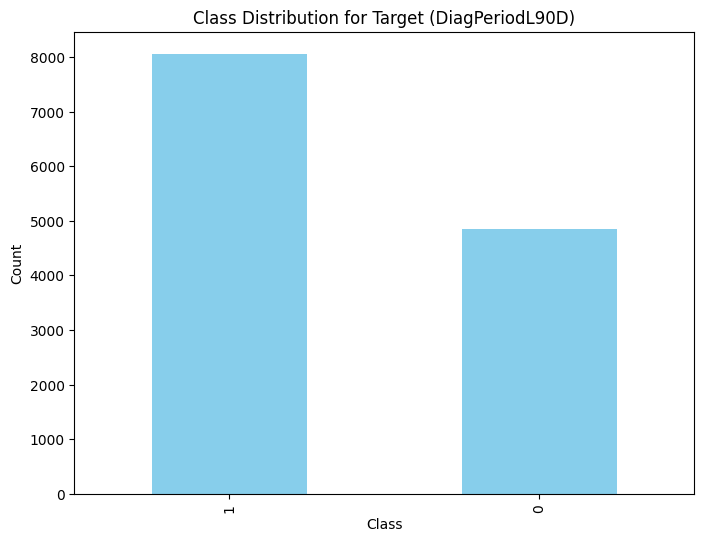

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data
train_data = pd.read_csv('training.csv')

# 1. Count the number of rows and features
print("Number of rows and features in the training dataset:")
print(f"Rows: {train_data.shape[0]}, Features: {train_data.shape[1]}")

# 2. Check for missing values
print("\nMissing Values:")
missing_values = train_data.isnull().sum()
print(missing_values[missing_values > 0])

# 3. Feature Analysis: Identify categorical and numerical features
categorical_features = train_data.select_dtypes(include=['object']).columns
numerical_features = train_data.select_dtypes(include=['float64', 'int64']).columns

print("\nCategorical Features:")
print(categorical_features)

print("\nNumerical Features:")
print(numerical_features)

# Create a summary table
feature_summary = []
for column in train_data.columns:
    feature_type = 'Categorical' if column in categorical_features else 'Numerical'
    unique_values = train_data[column].unique()[:5]  # Show first 5 unique values
    unique_summary = unique_values if feature_type == 'Categorical' else f"Range: {train_data[column].min()} to {train_data[column].max()}"
    missing_count = train_data[column].isnull().sum()
    feature_summary.append({
        'Feature': column,
        'Type': feature_type,
        'Unique Values': unique_summary,
        'Missing Values': missing_count
    })

feature_summary_df = pd.DataFrame(feature_summary)
print("\nFeature Summary Table:")
print(feature_summary_df)

# 4. Identify Outliers (using IQR method for numerical columns)
def detect_outliers(column):
    if column in numerical_features:
        Q1 = train_data[column].quantile(0.25)
        Q3 = train_data[column].quantile(0.75)
        IQR = Q3 - Q1
        outliers = train_data[(train_data[column] < (Q1 - 1.5 * IQR)) | (train_data[column] > (Q3 + 1.5 * IQR))]
        return len(outliers)
    return 0

outliers_summary = {col: detect_outliers(col) for col in numerical_features}
print("\nOutliers Summary:")
print(outliers_summary)

# 5. Class Imbalance (for classification target)
if 'DiagPeriodL90D' in train_data.columns:
    print("\nClass Imbalance Check (DiagPeriodL90D):")
    print(train_data['DiagPeriodL90D'].value_counts())
    print(f"Class Imbalance Ratio:\n{train_data['DiagPeriodL90D'].value_counts(normalize=True)}")
else:
    print("\nDiagPeriodL90D column not found. Cannot check class imbalance.")

# 6. Determine Target Type
if 'DiagPeriodL90D' in train_data.columns:
    print("\nTarget Analysis (DiagPeriodL90D):")
    unique_values = train_data['DiagPeriodL90D'].unique()
    if len(unique_values) <= 10:
        print(f"Target is likely for classification. Unique values: {unique_values}")
    else:
        print(f"Target is likely for regression. Range: {train_data['DiagPeriodL90D'].min()} to {train_data['DiagPeriodL90D'].max()}")
else:
    print("No target column identified. Please verify the dataset.")

# 7. Visualize Class Distribution (for classification tasks)
if 'DiagPeriodL90D' in train_data.columns:
    plt.figure(figsize=(8, 6))
    train_data['DiagPeriodL90D'].value_counts().plot(kind='bar', color='skyblue')
    plt.title("Class Distribution for Target (DiagPeriodL90D)")
    plt.xlabel("Class")
    plt.ylabel("Count")
    plt.show()


## Data Visualization

* For classification: compare histogram every feature between the classes. Lots of examples of this in class.
* For regression:
    * Define 2 or more class based on value of the regression target.
        * For example: if regression target is between 0 and 1:
            * 0.0-0.25: Class 1
            * 0.25-0.5: Class 2
            * 0.5-0.75: Class 3
            * 0.75-1.0: Class 4
    * Compare histograms of the features between the classes.
        
* Note that for categorical features, often times the information in the histogram could be better presented in a table.    
* Make comments on what features look most promising for ML task.


Feature Summary Table:
           Feature         Type  \
0       patient_id    Numerical   
1     patient_race  Categorical   
2       payer_type  Categorical   
3    patient_state  Categorical   
4     patient_zip3    Numerical   
..             ...          ...   
79           Ozone    Numerical   
80            PM25    Numerical   
81             N02    Numerical   
82  DiagPeriodL90D    Numerical   
83          target    Numerical   

                                      Unique Values  Missing Values  
0                           Range: 100063 to 999896               0  
1              [nan, White, Other, Hispanic, Asian]            6385  
2   [MEDICAID, COMMERCIAL, MEDICARE ADVANTAGE, nan]            1803  
3                              [CA, TX, ID, NY, IL]              51  
4                                 Range: 101 to 999               0  
..                                              ...             ...  
79                Range: 30.93931639 to 52.23720962              

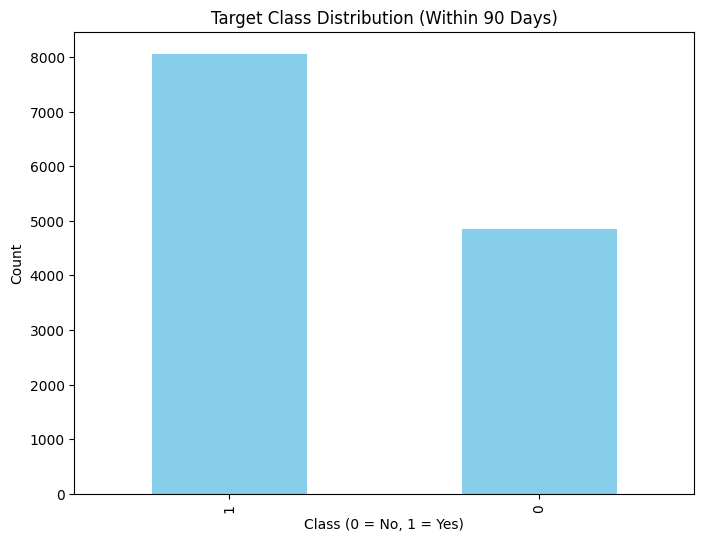


Outliers Summary:
{'patient_id': 0, 'patient_zip3': 0, 'patient_age': 44, 'bmi': 2, 'population': 192, 'density': 1092, 'age_median': 62, 'age_under_10': 171, 'age_10_to_19': 254, 'age_20s': 391, 'age_30s': 375, 'age_40s': 141, 'age_50s': 131, 'age_60s': 222, 'age_70s': 316, 'age_over_80': 470, 'male': 549, 'female': 549, 'married': 153, 'divorced': 26, 'never_married': 26, 'widowed': 319, 'family_size': 142, 'family_dual_income': 94, 'income_household_median': 703, 'income_household_under_5': 299, 'income_household_5_to_10': 555, 'income_household_10_to_15': 301, 'income_household_15_to_20': 441, 'income_household_20_to_25': 240, 'income_household_25_to_35': 87, 'income_household_35_to_50': 114, 'income_household_50_to_75': 455, 'income_household_75_to_100': 60, 'income_household_100_to_150': 22, 'income_household_150_over': 374, 'income_household_six_figure': 138, 'income_individual_median': 630, 'home_ownership': 129, 'housing_units': 195, 'home_value': 1148, 'rent_median': 72, 're

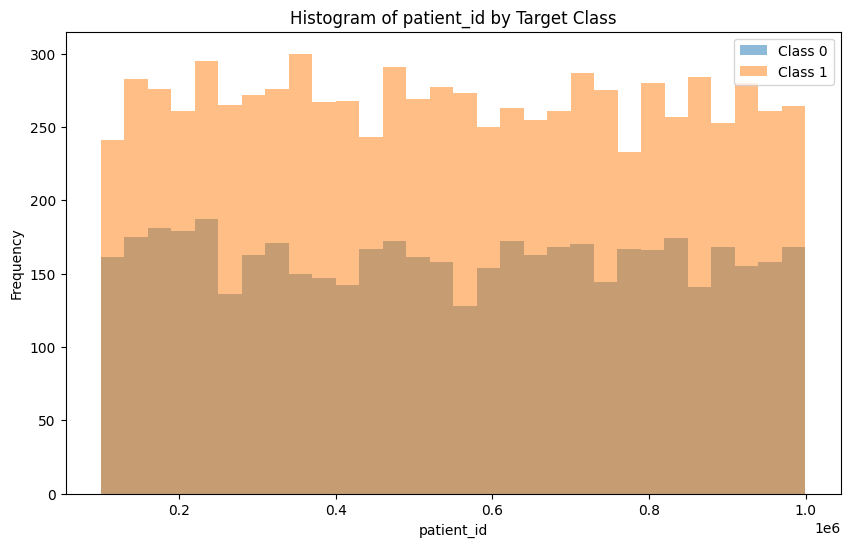

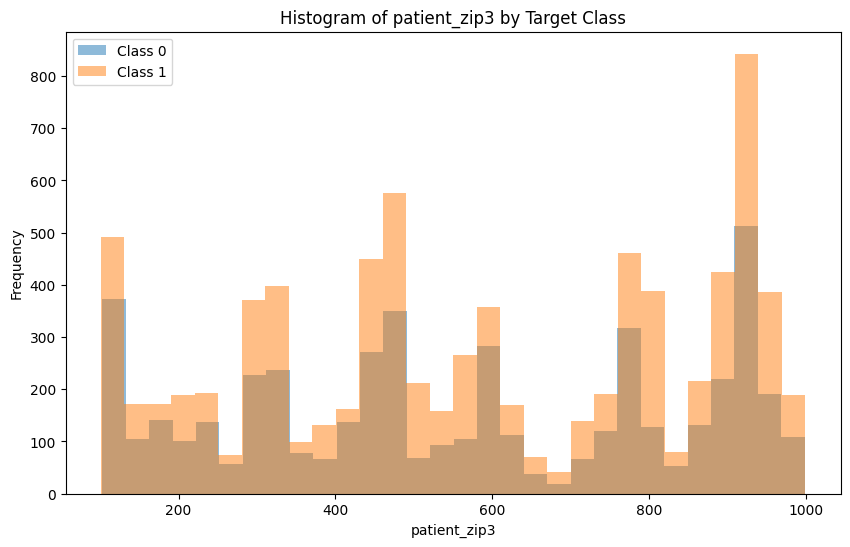

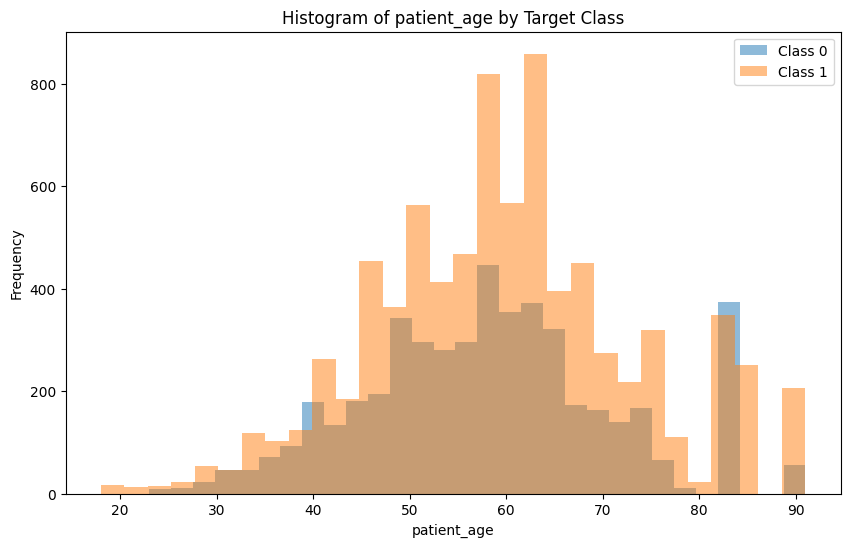

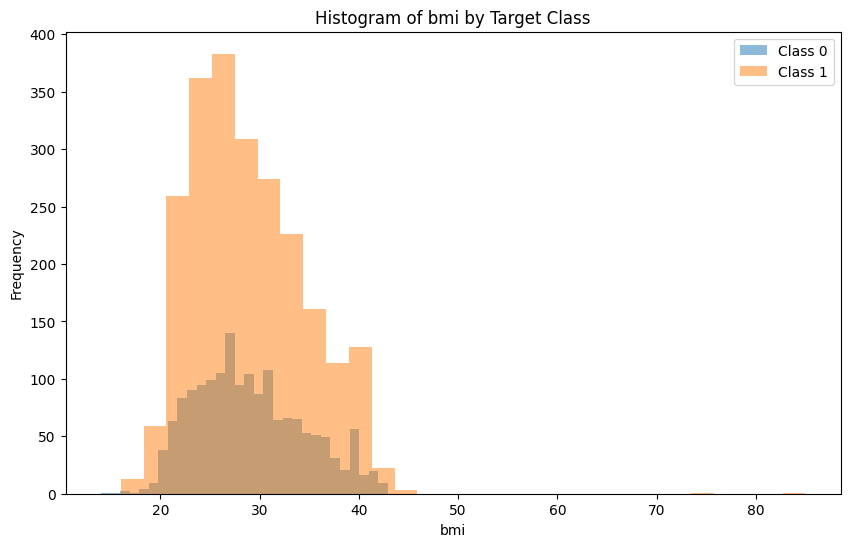

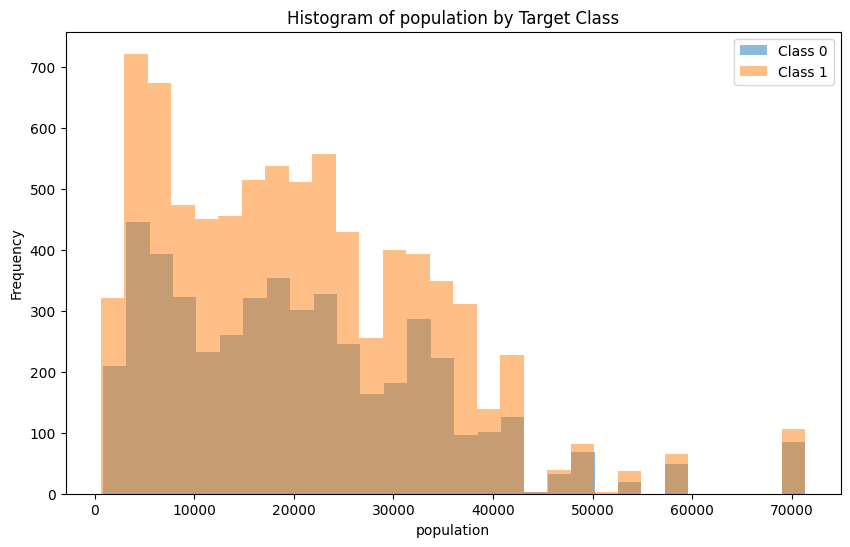

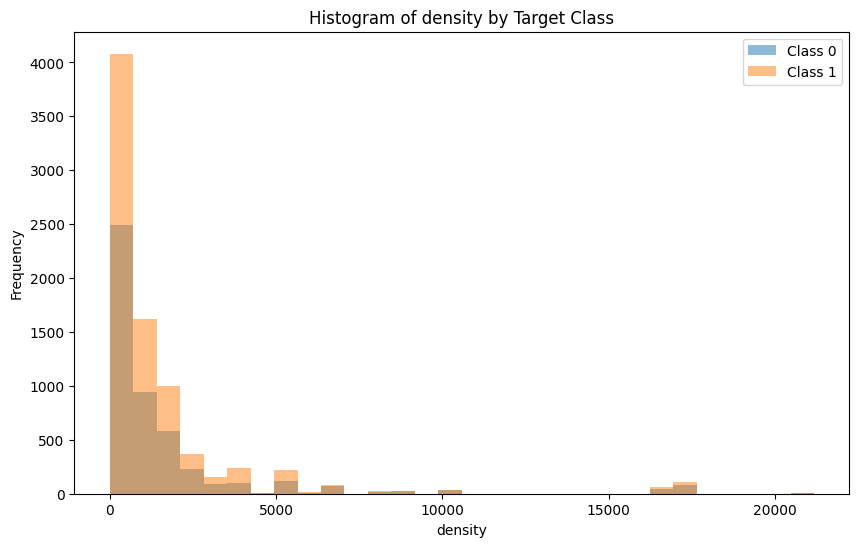

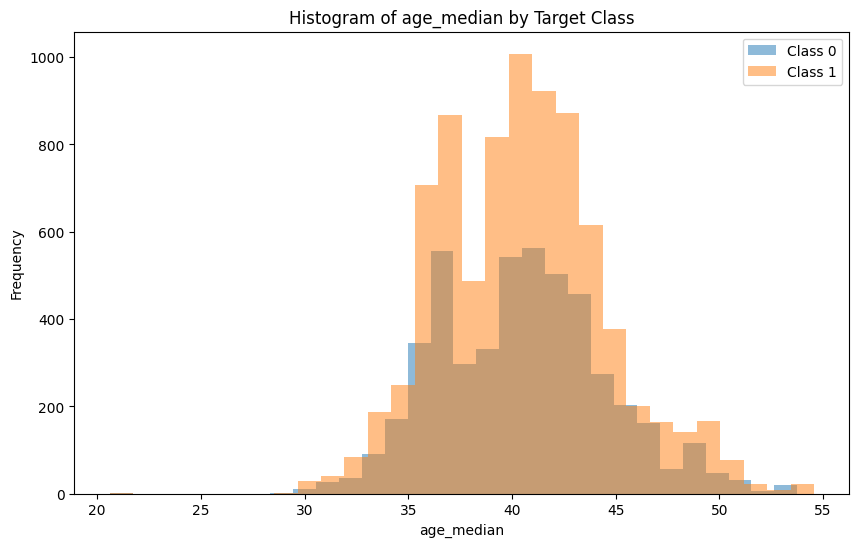

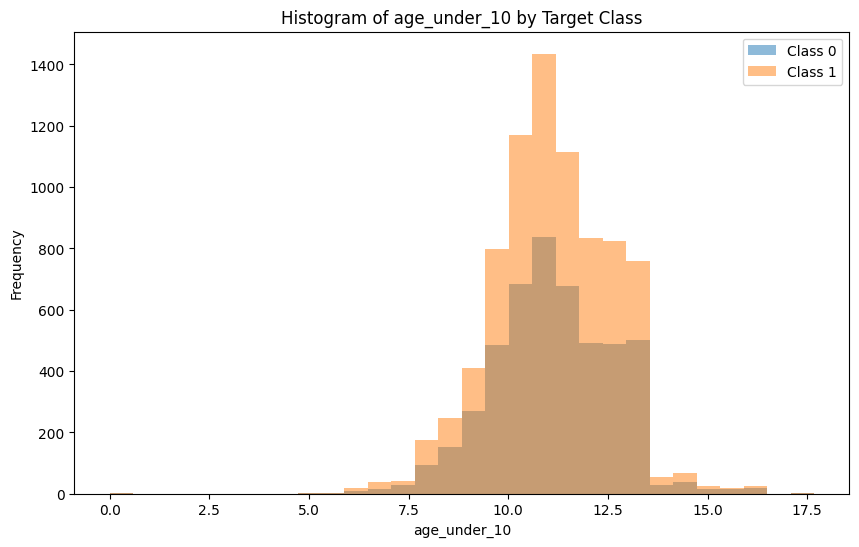

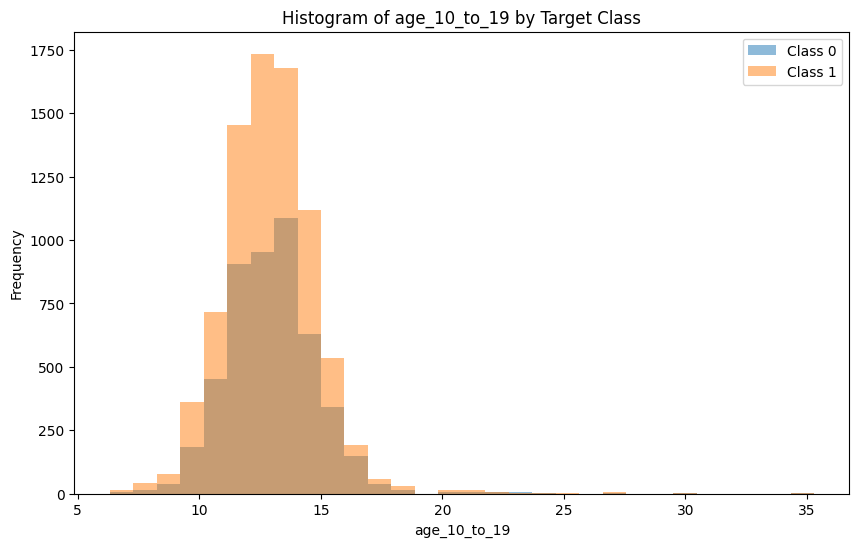

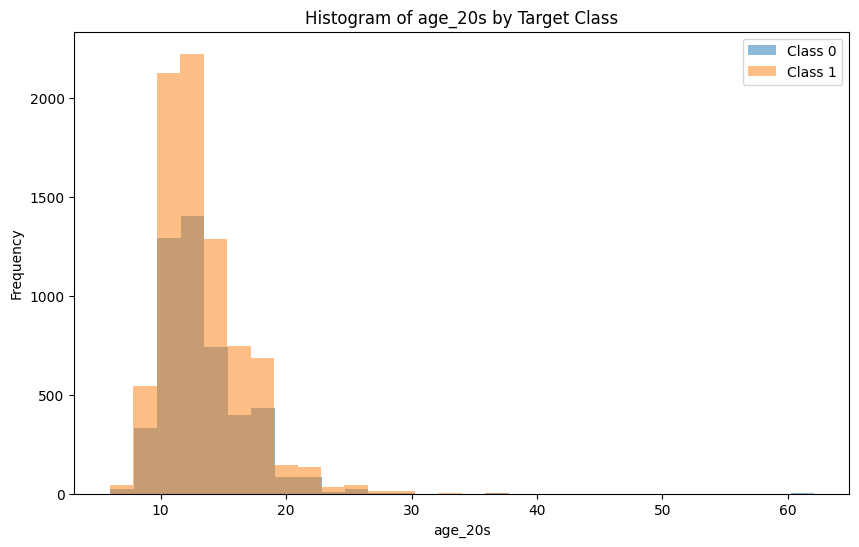

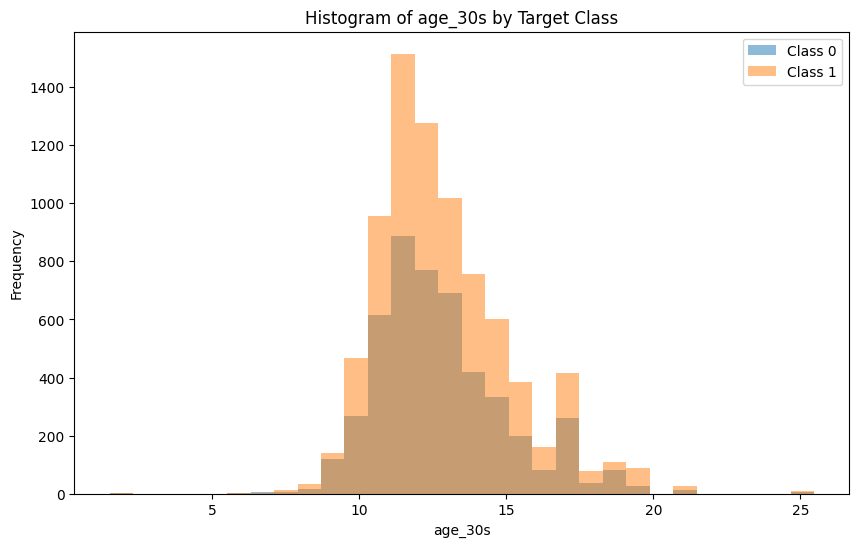

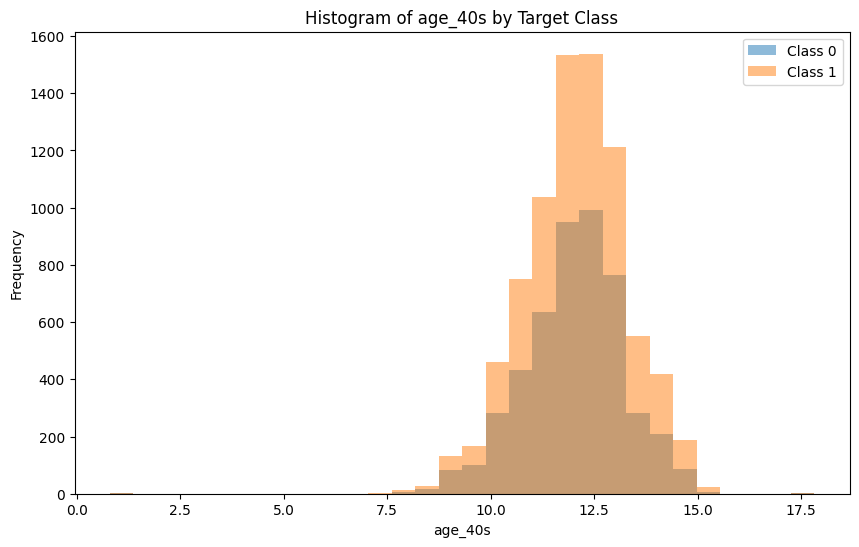

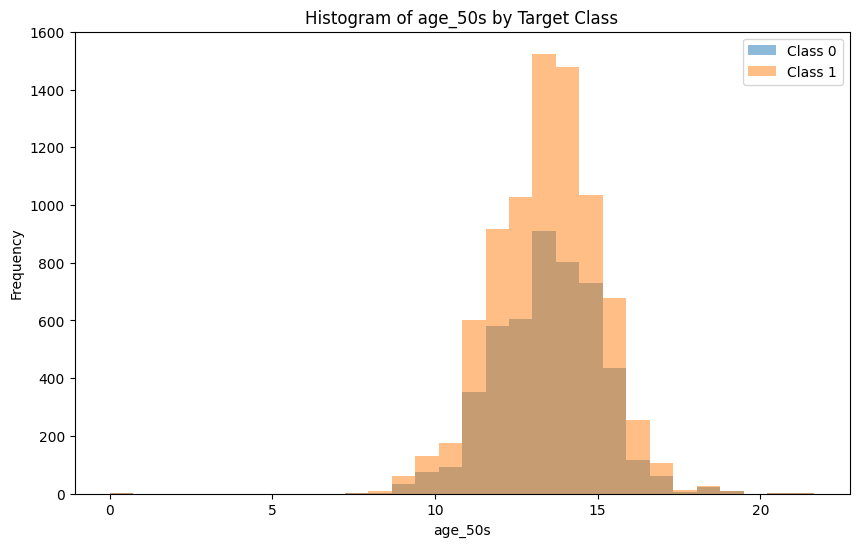

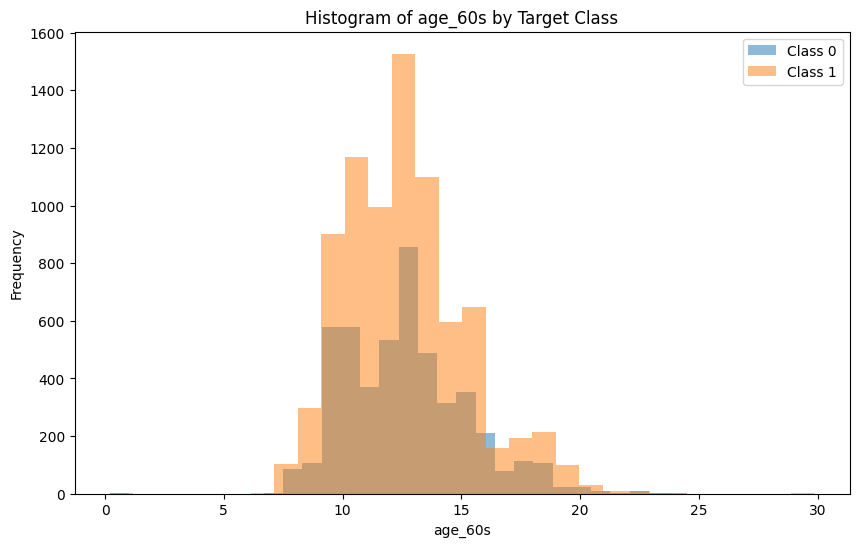

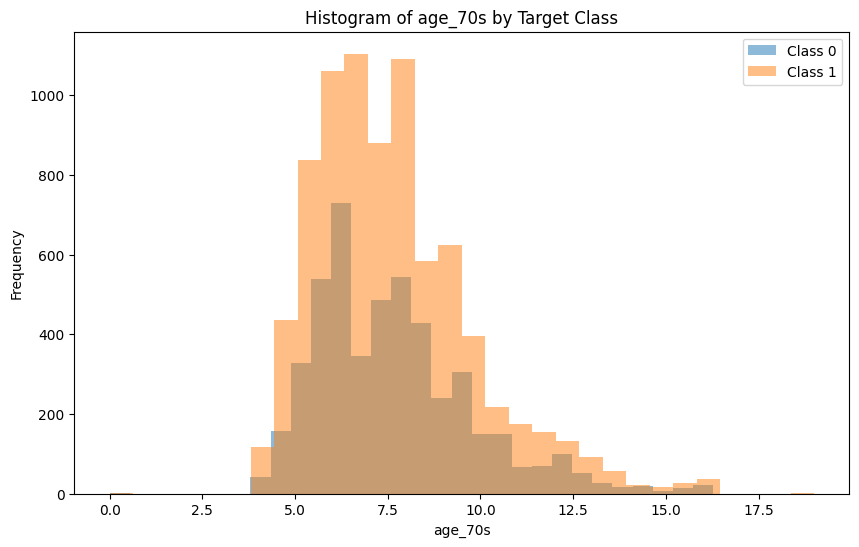

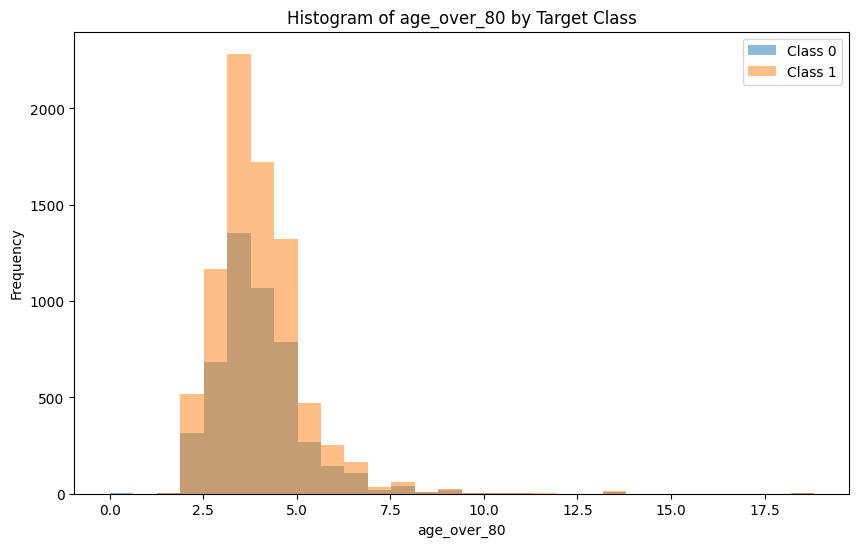

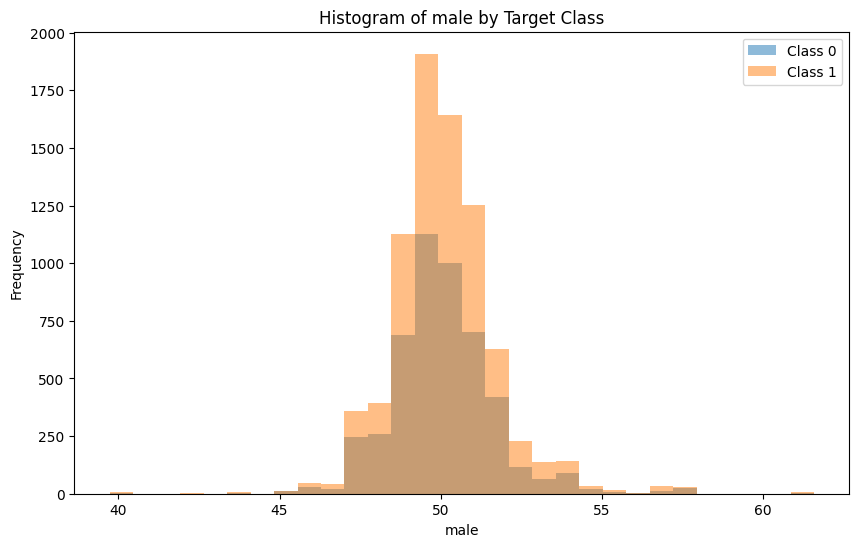

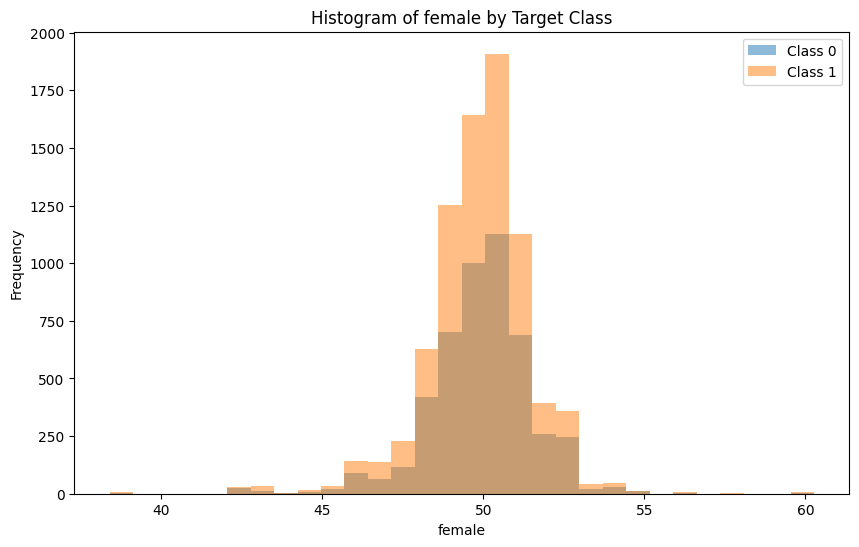

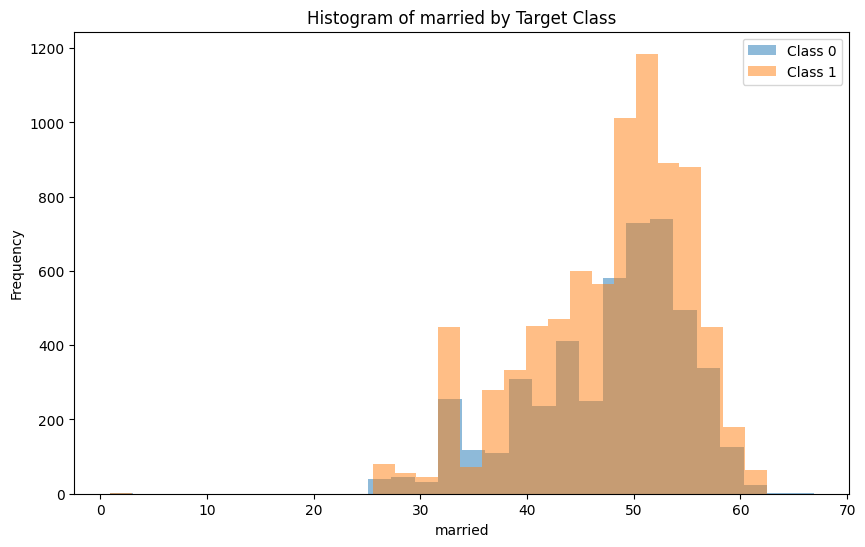

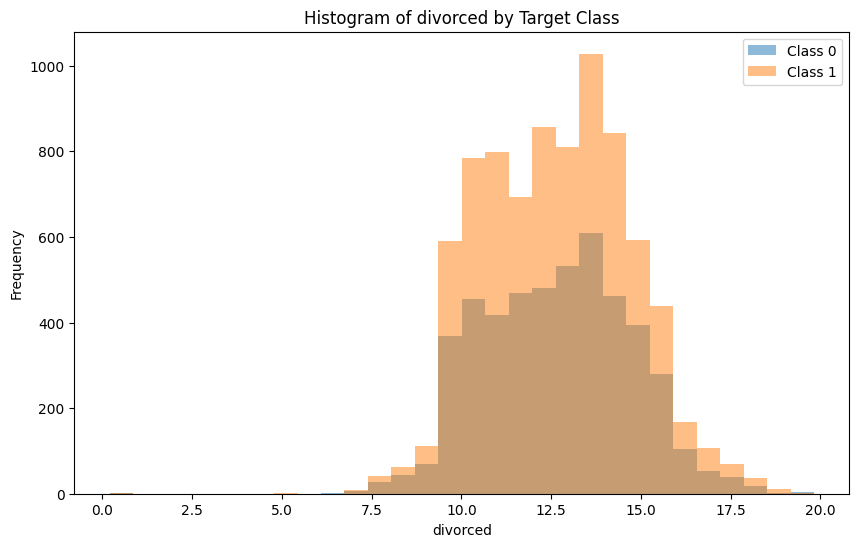

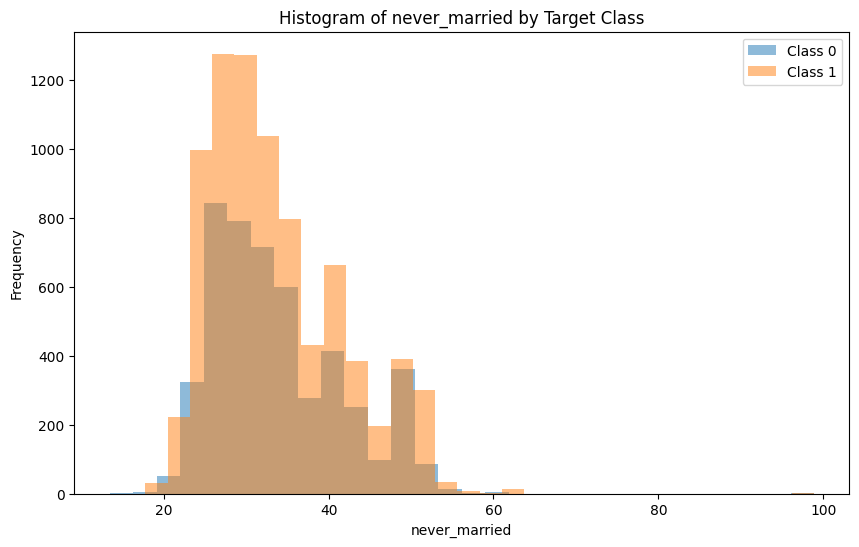

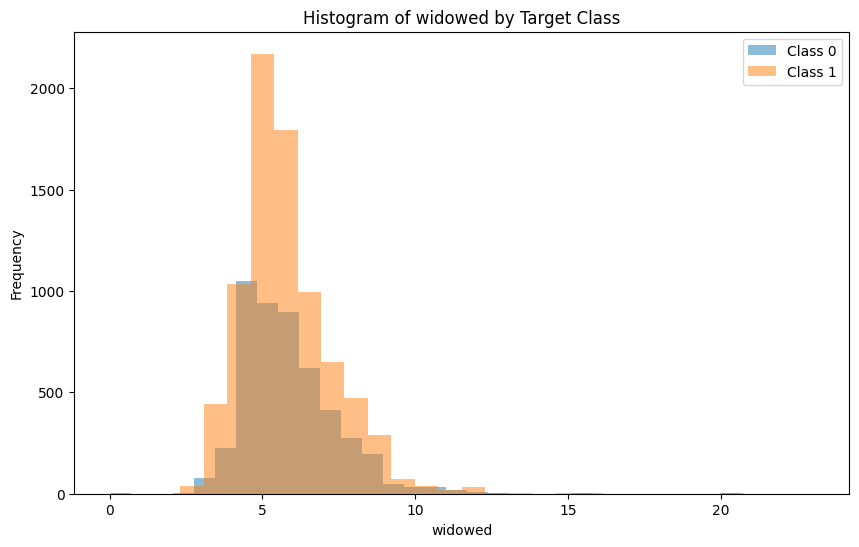

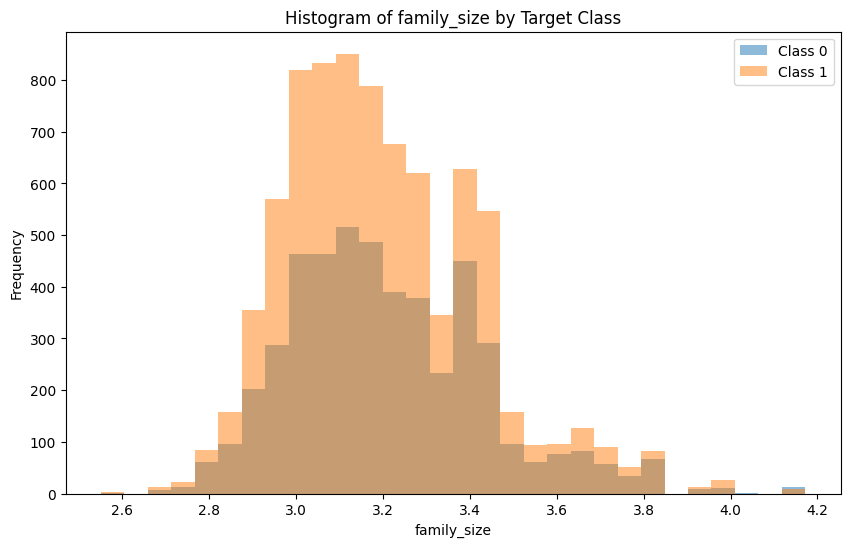

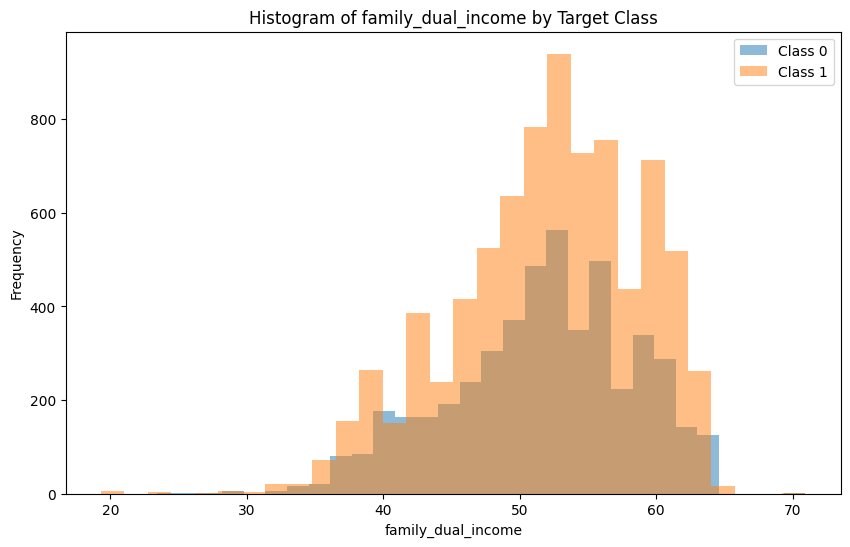

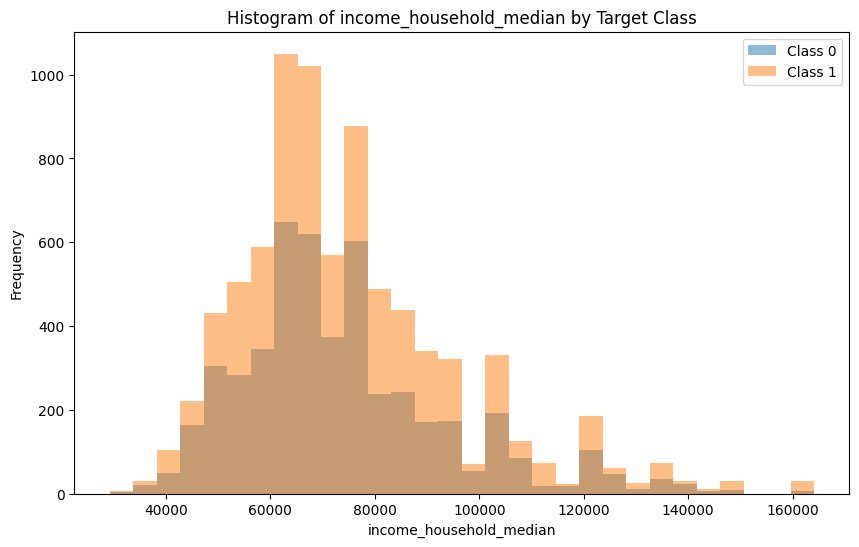

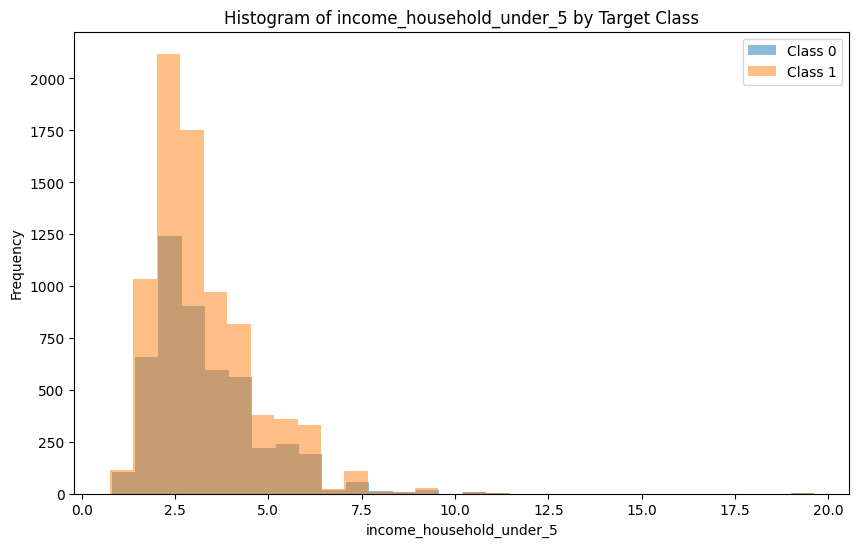

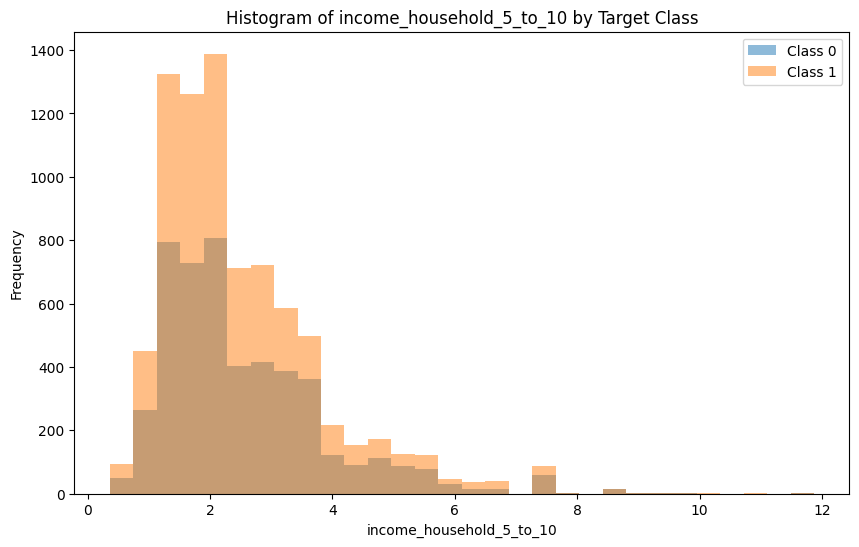

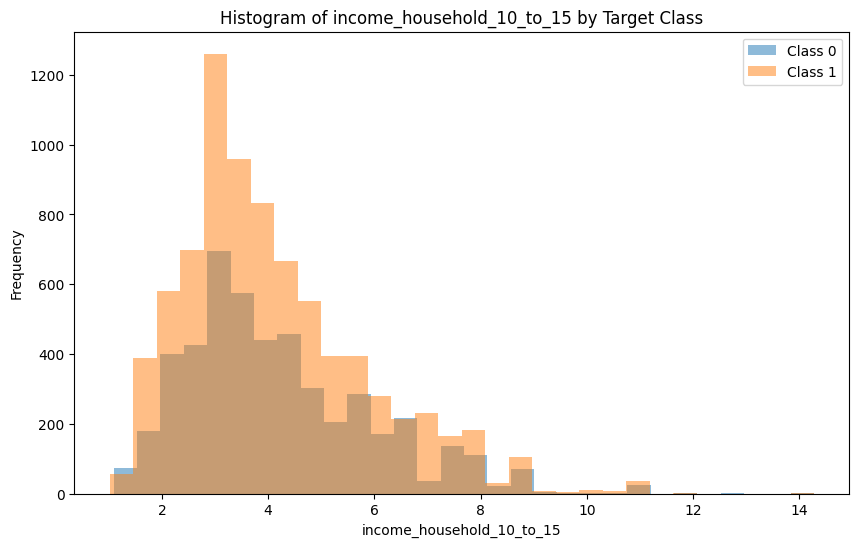

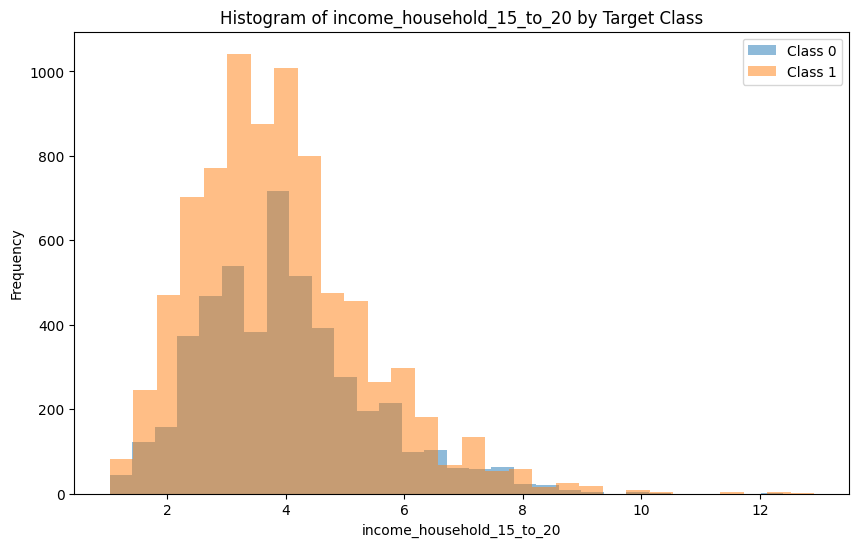

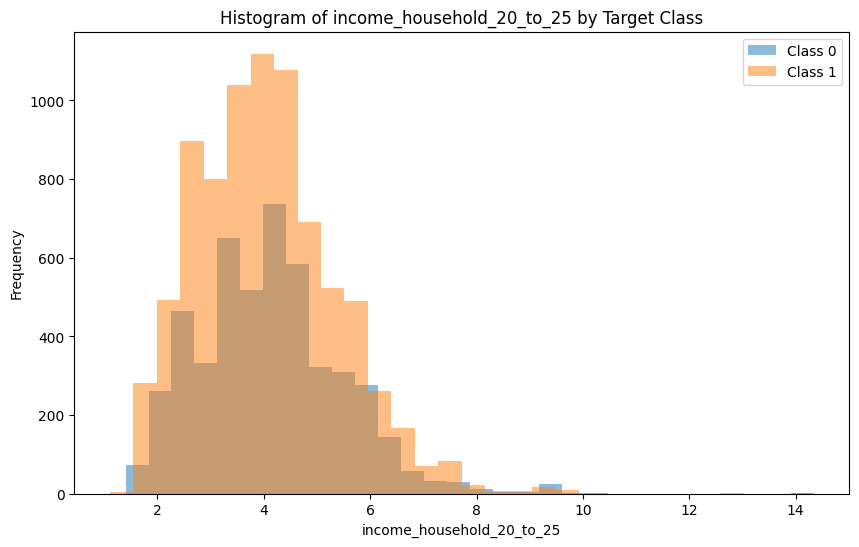

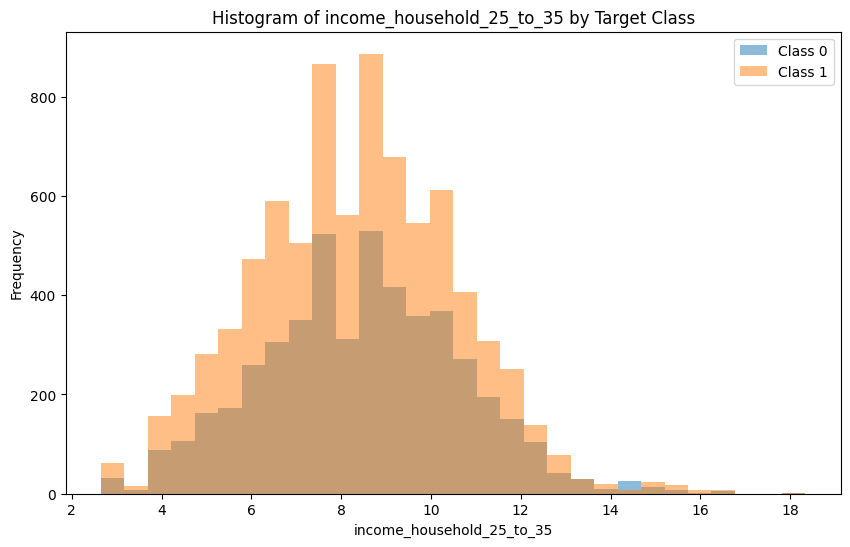

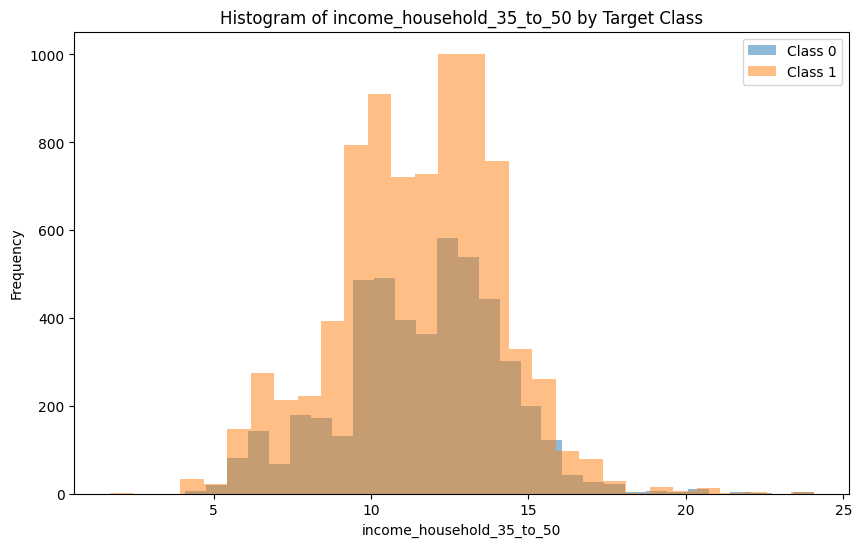

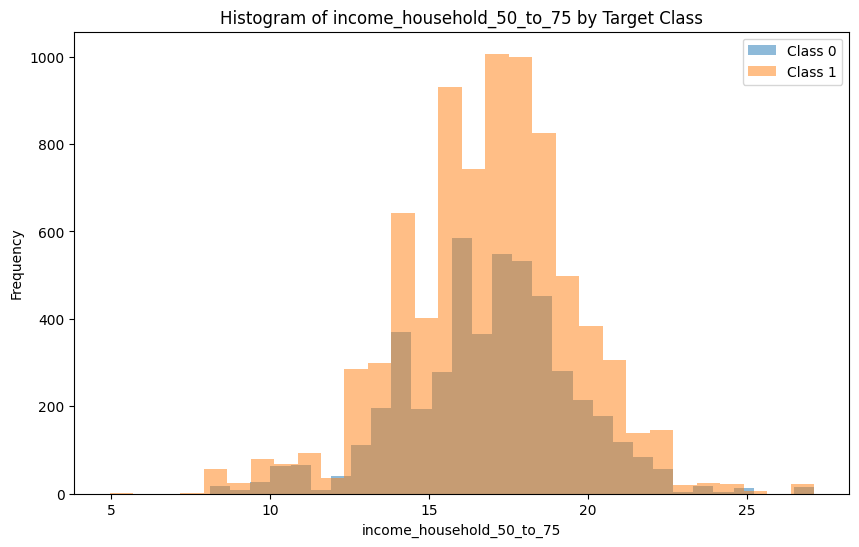

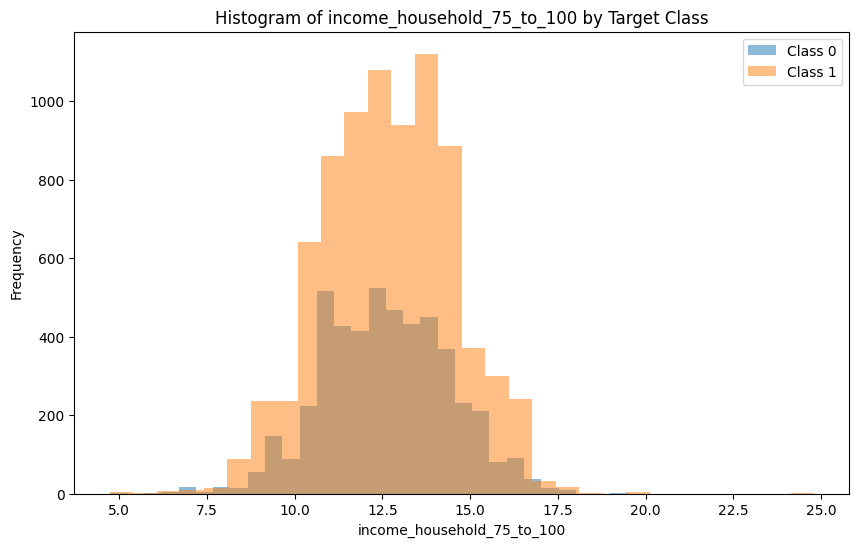

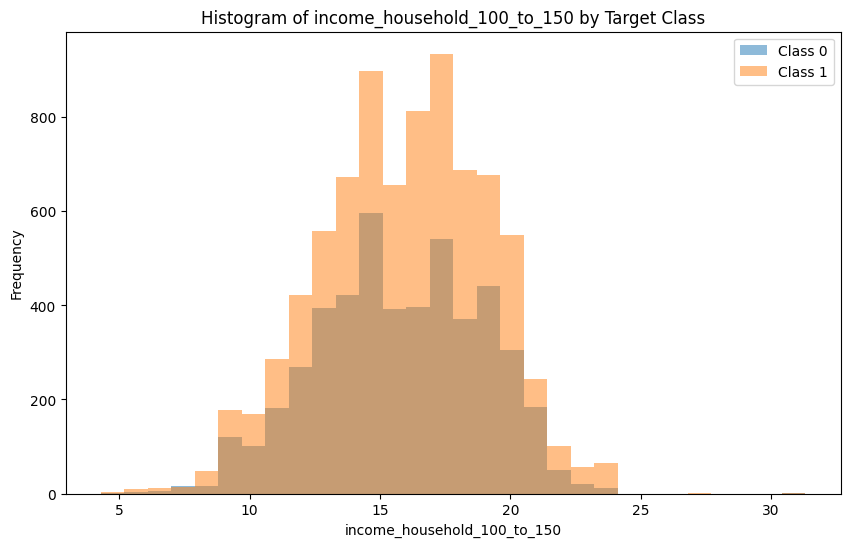

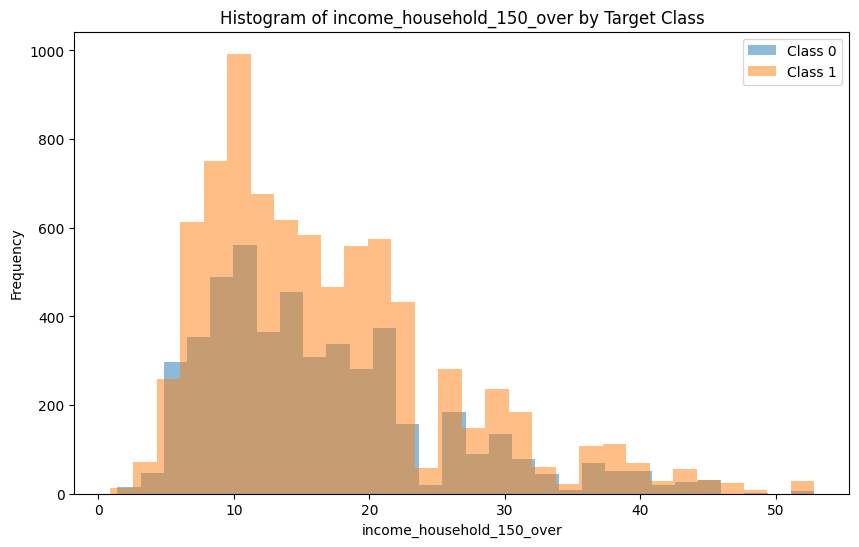

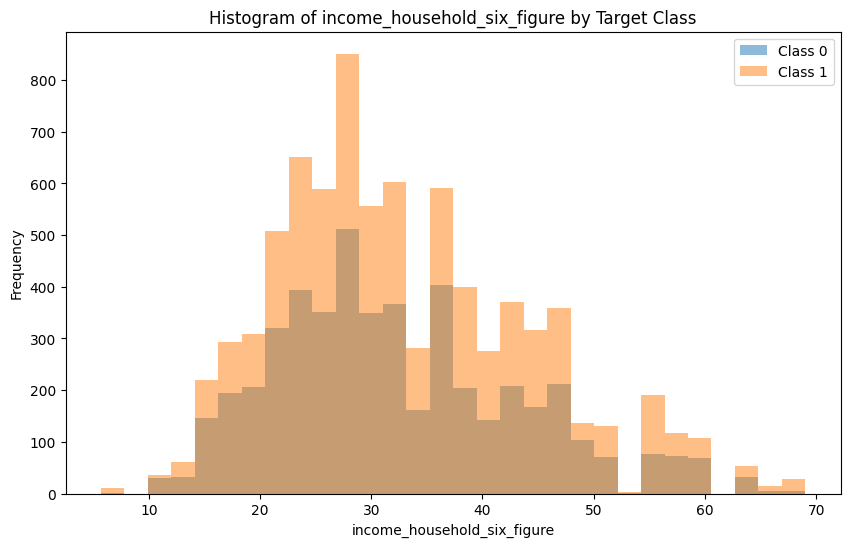

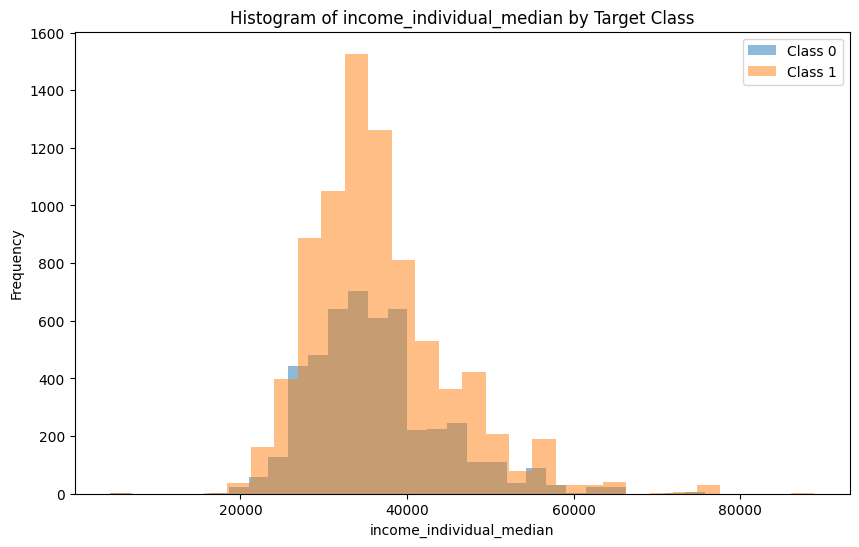

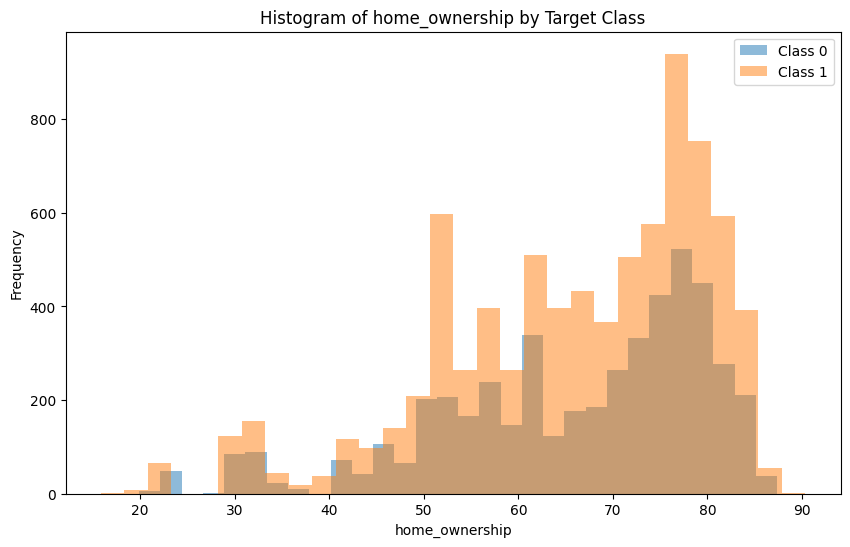

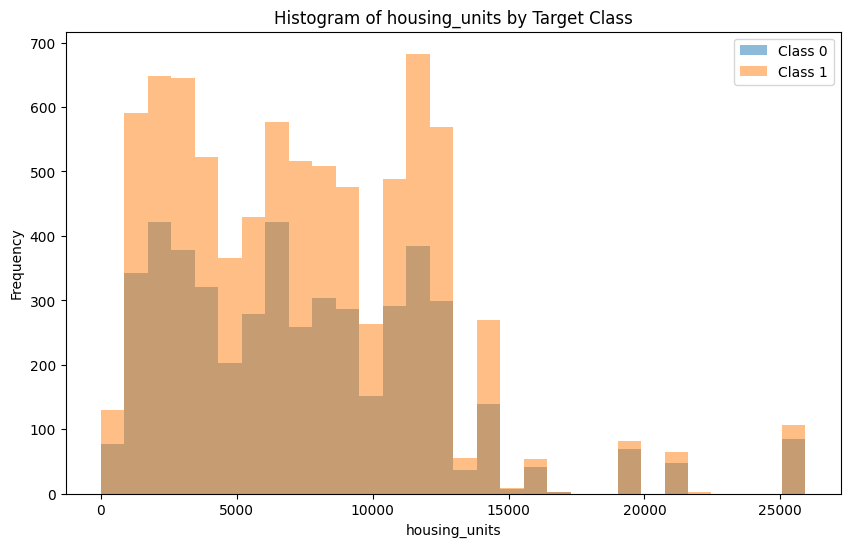

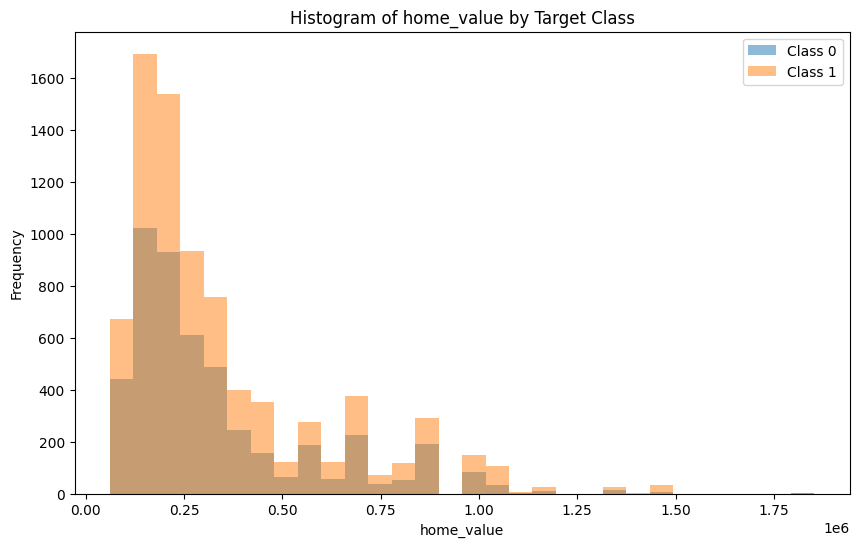

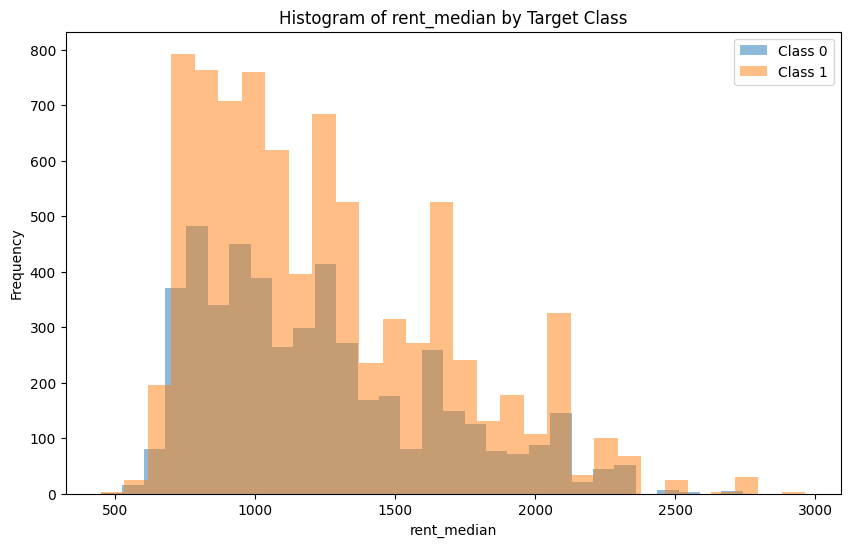

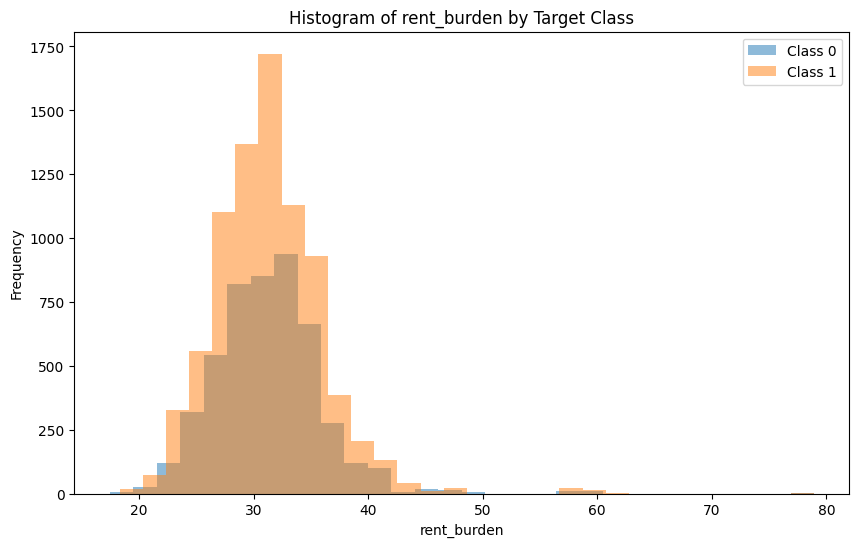

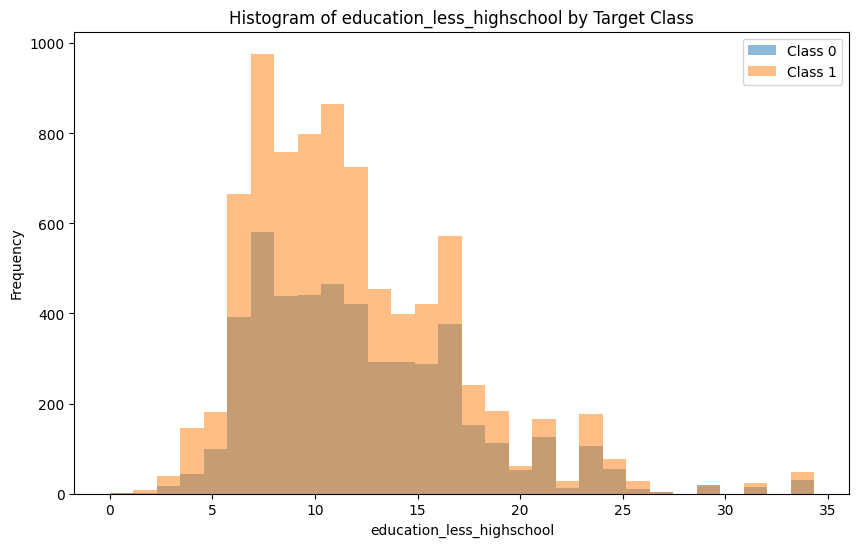

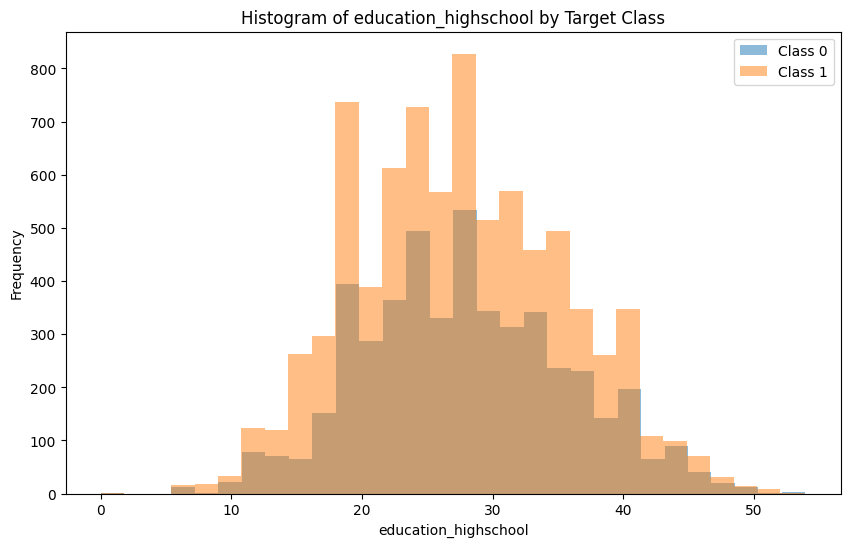

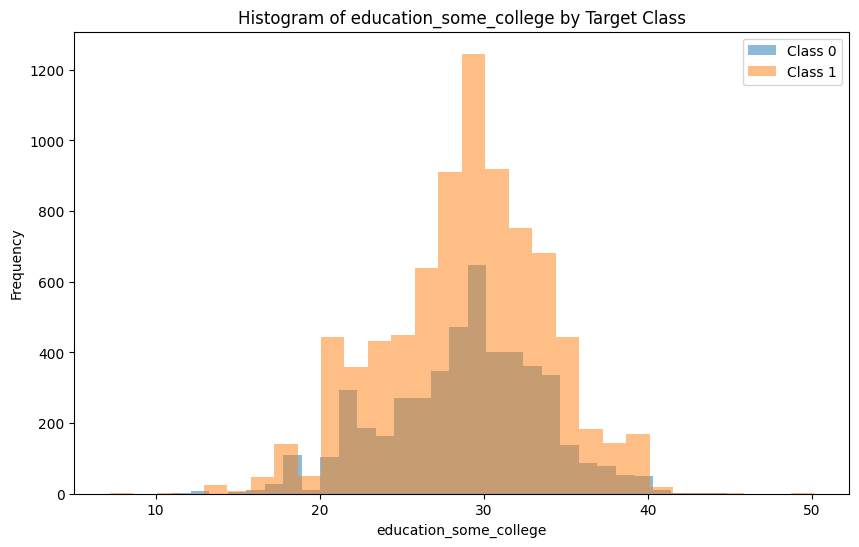

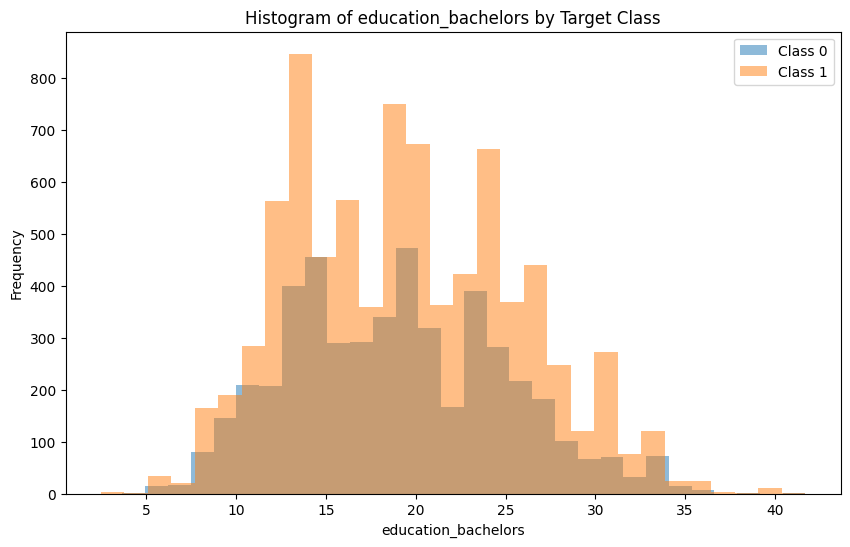

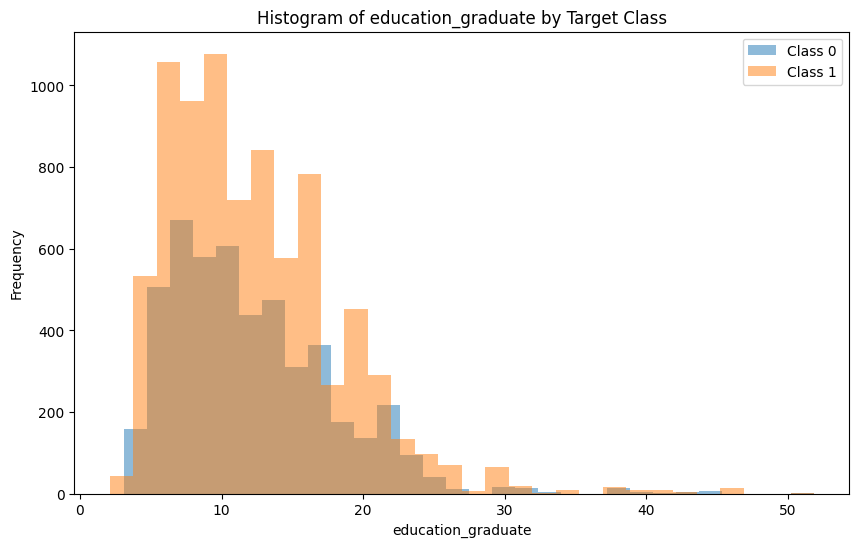

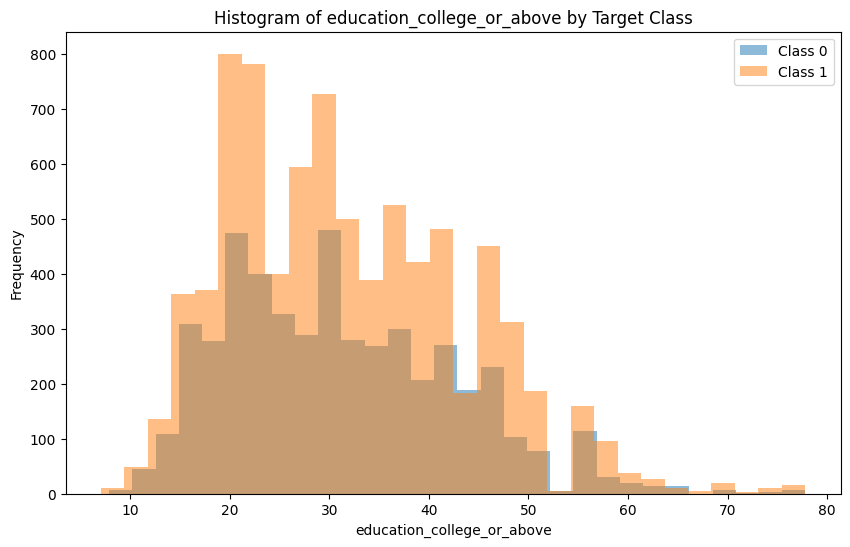

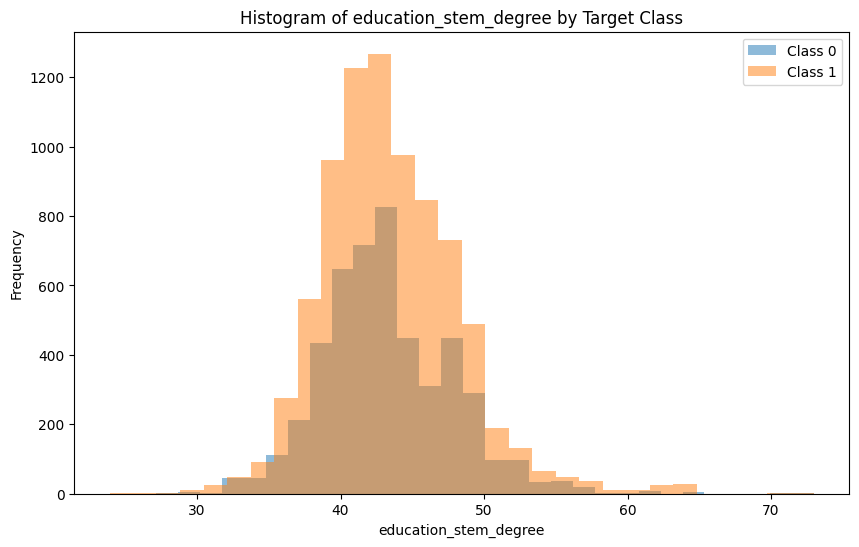

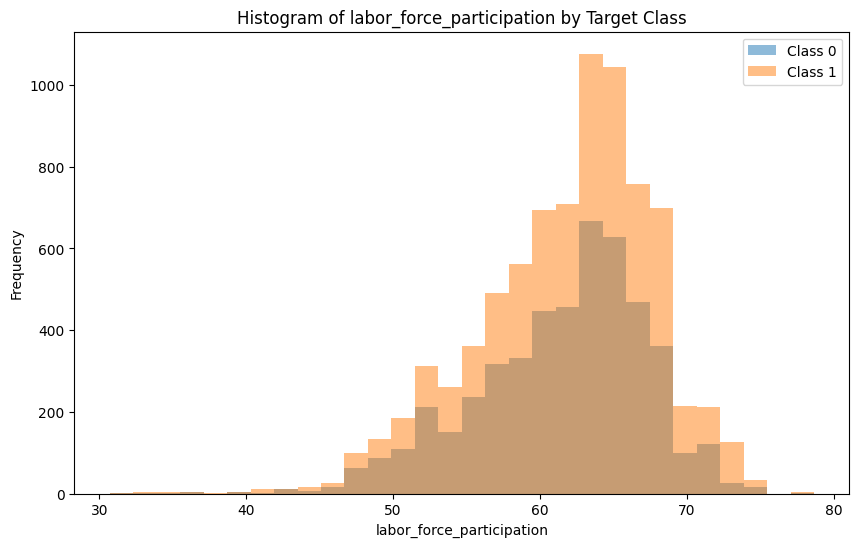

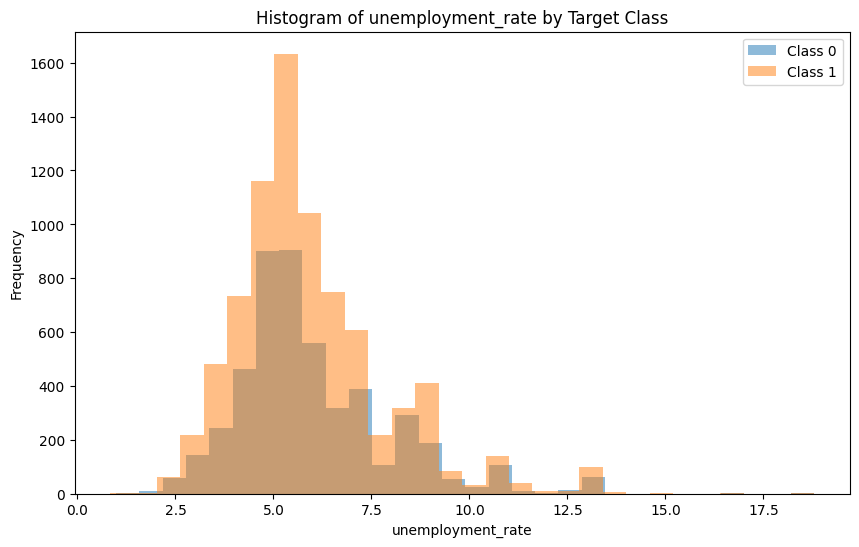

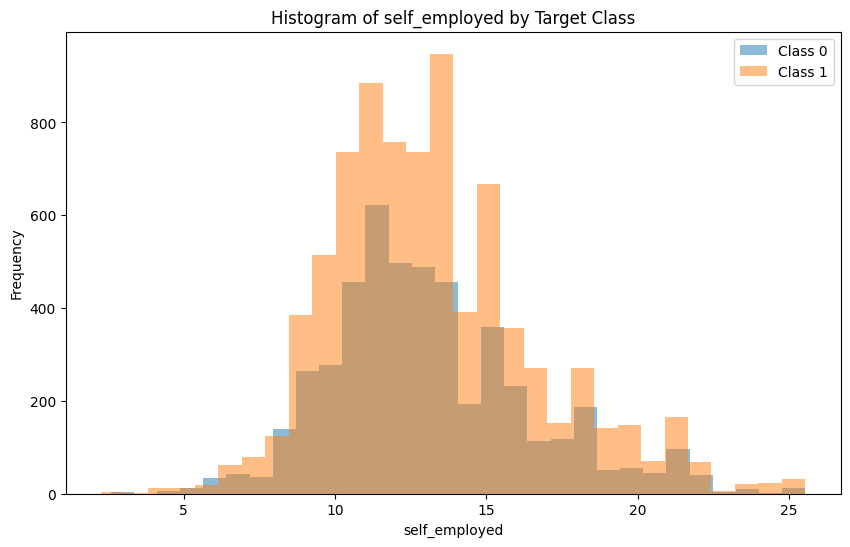

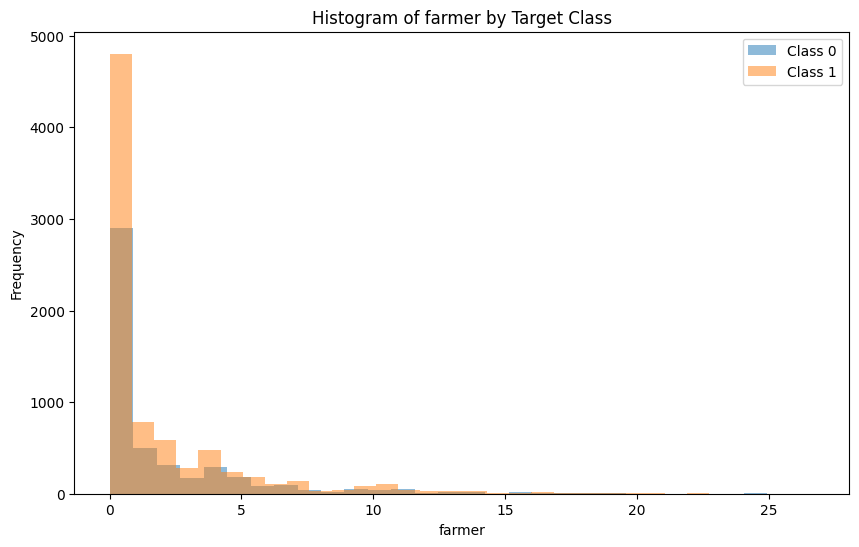

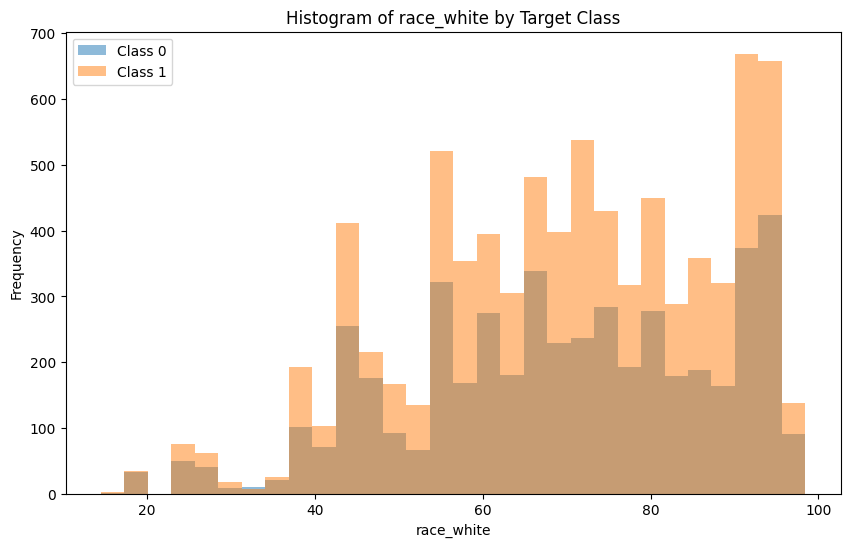

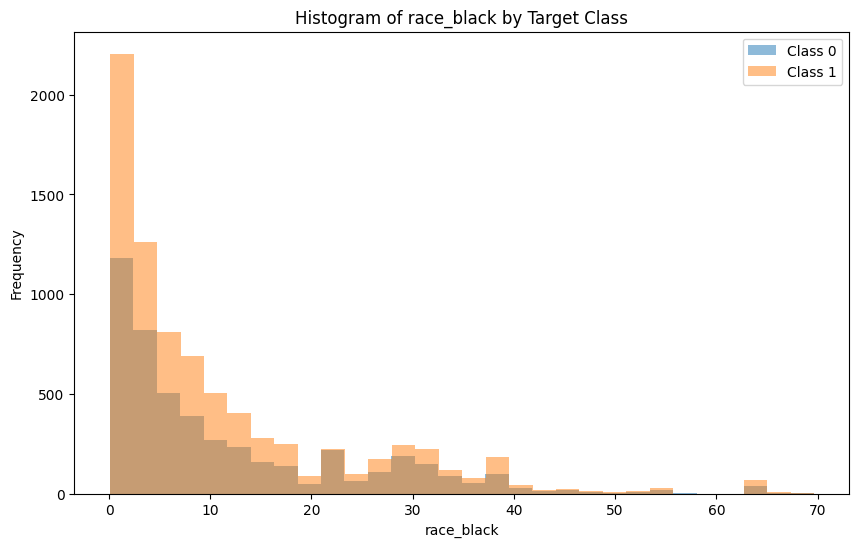

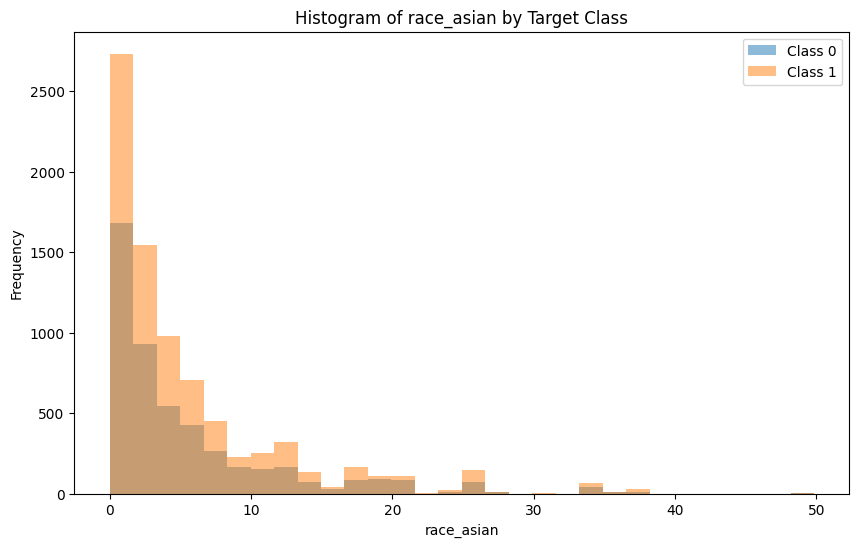

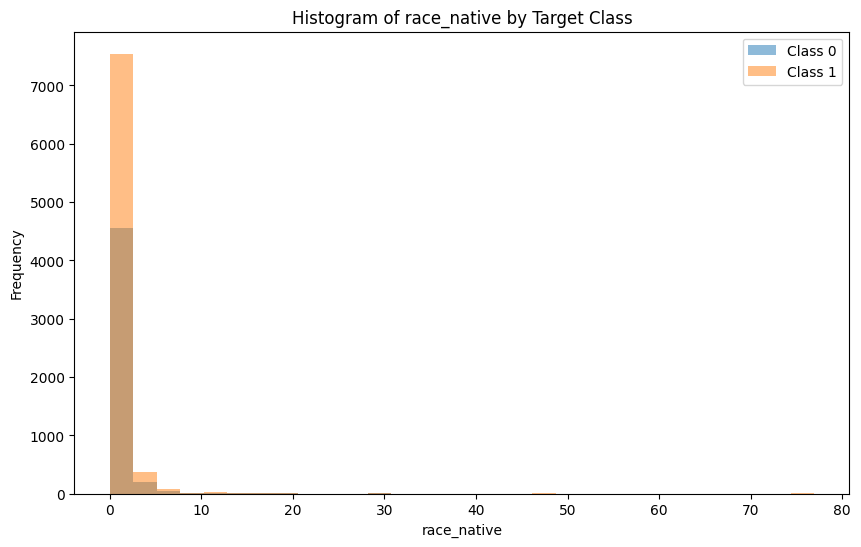

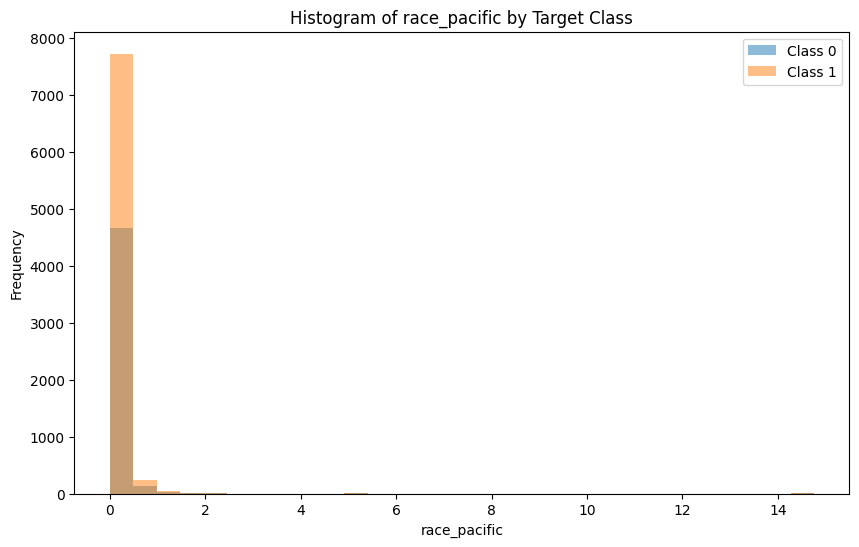

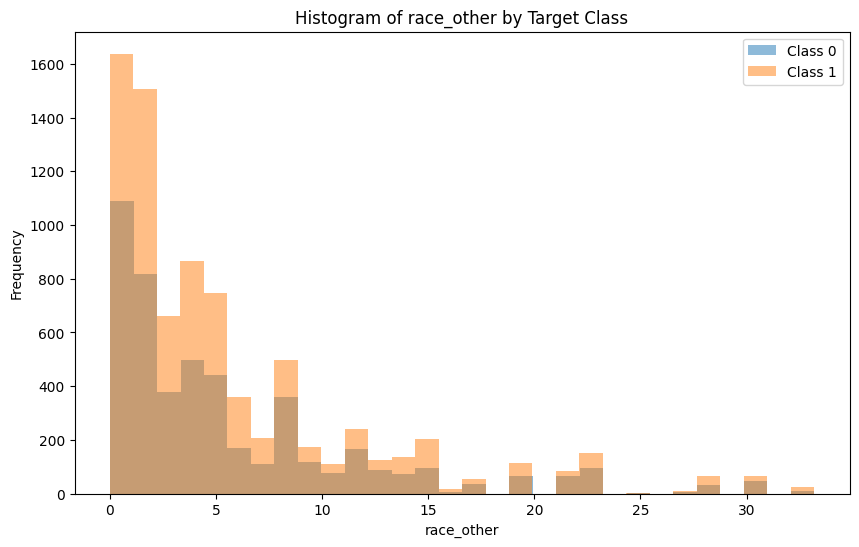

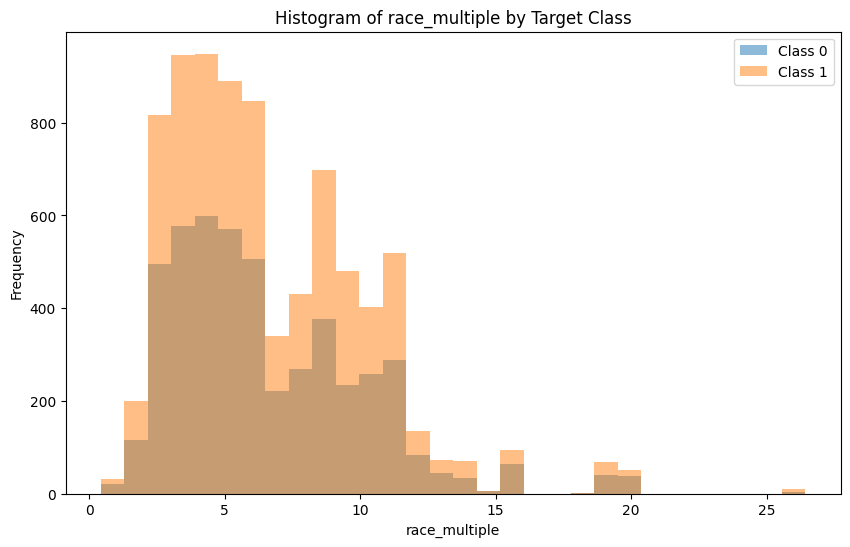

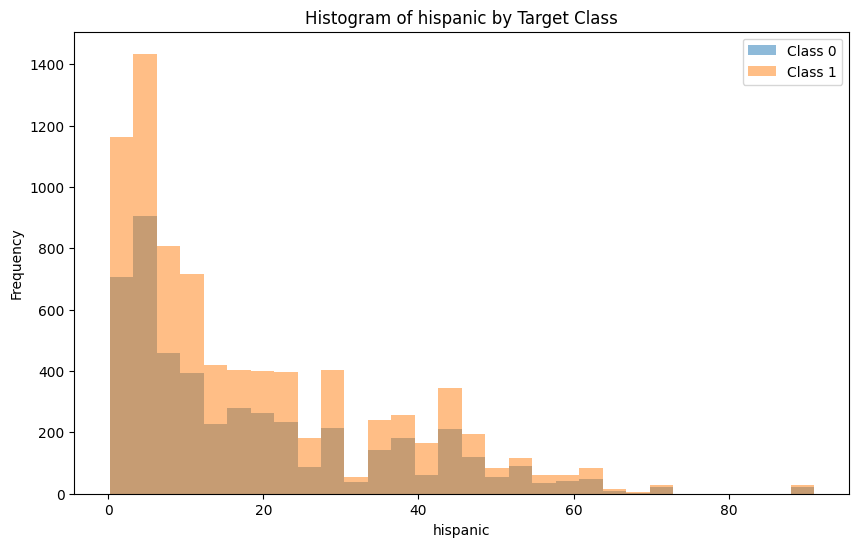

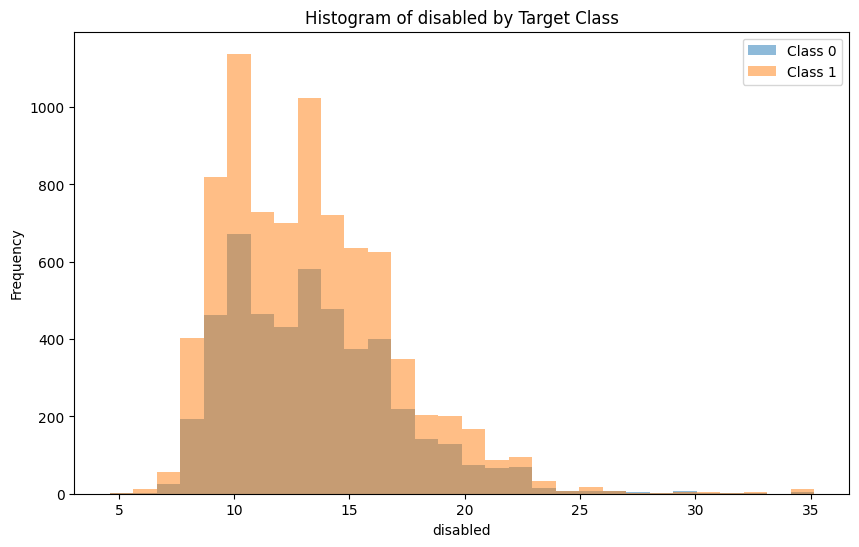

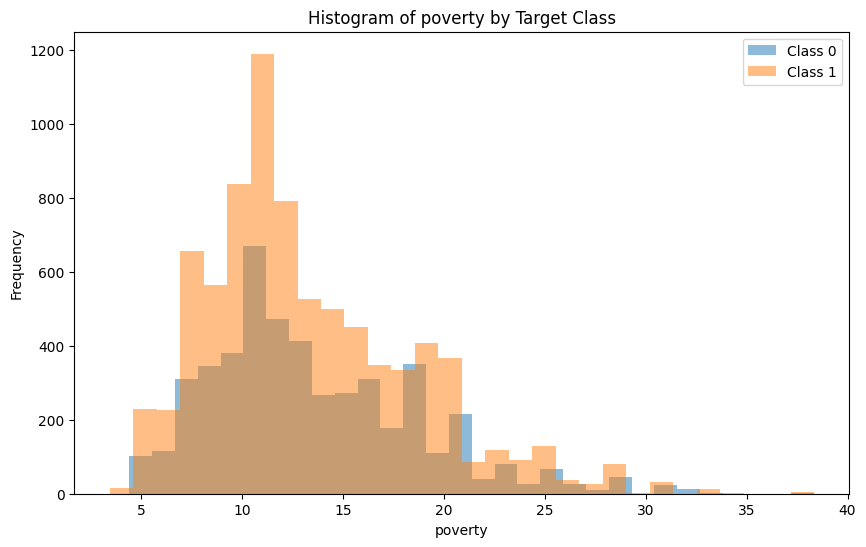

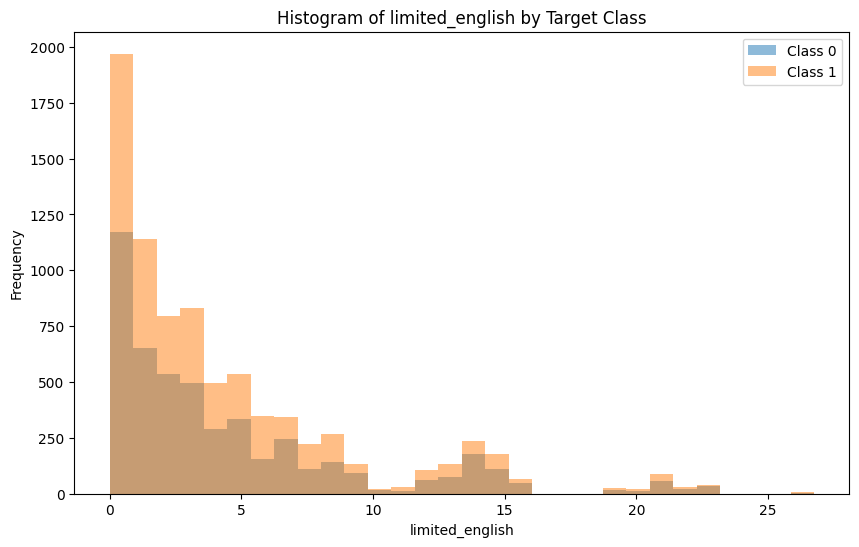

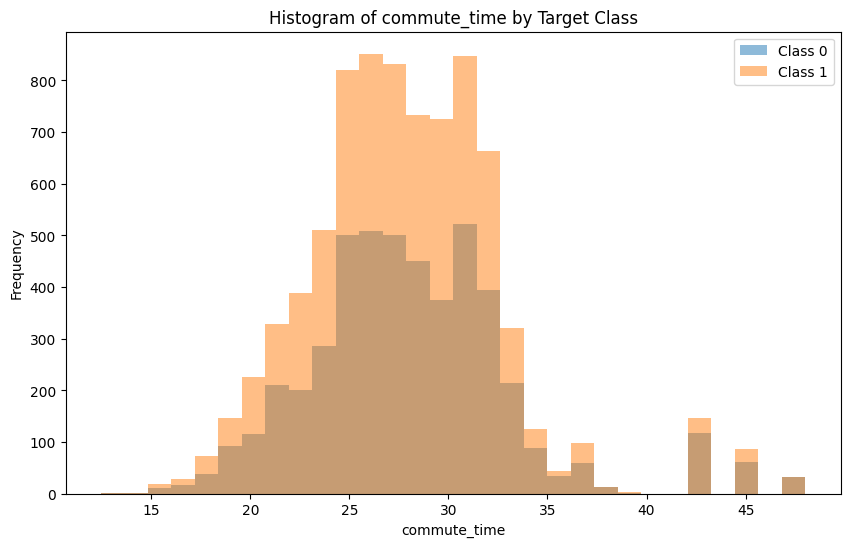

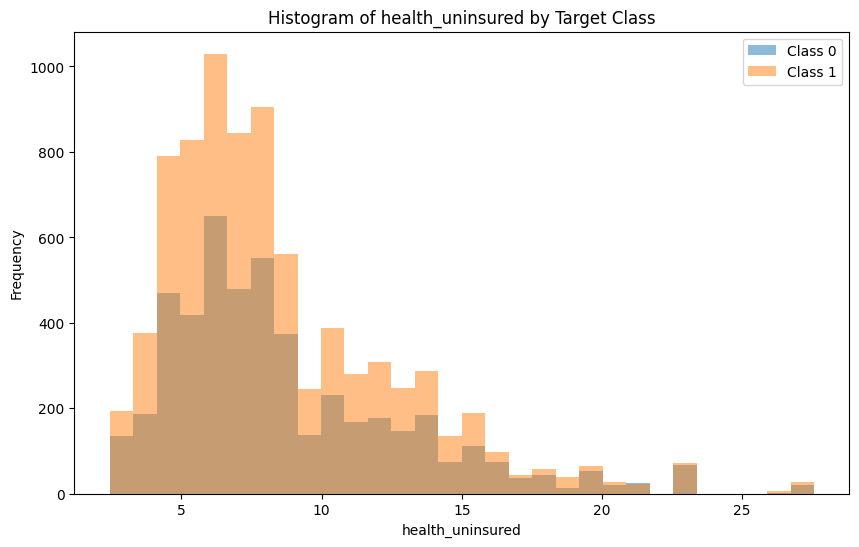

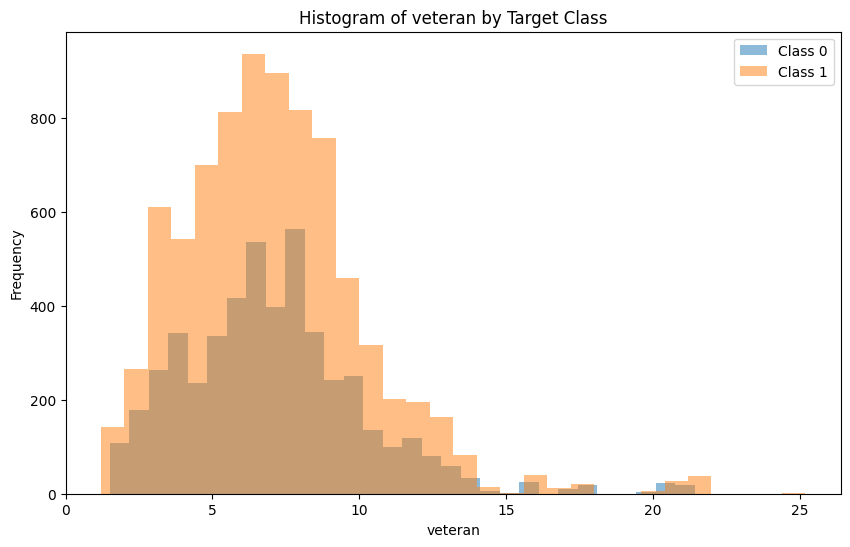

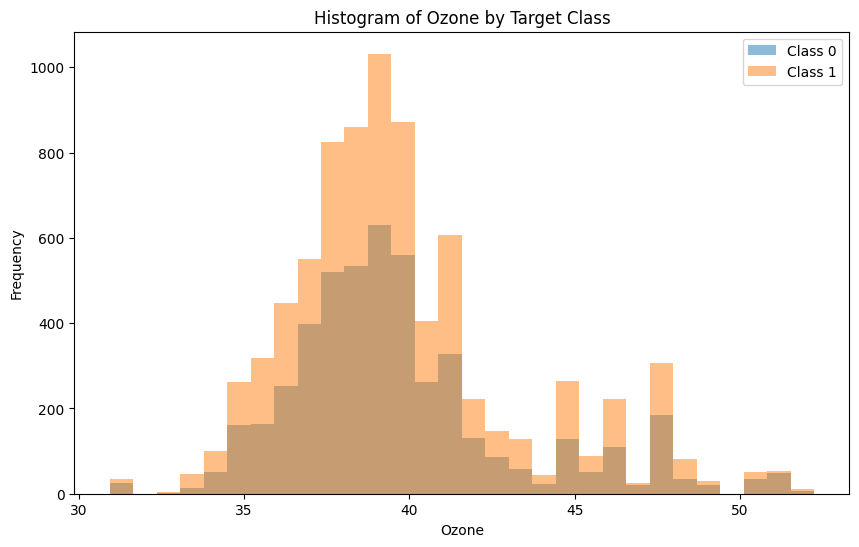

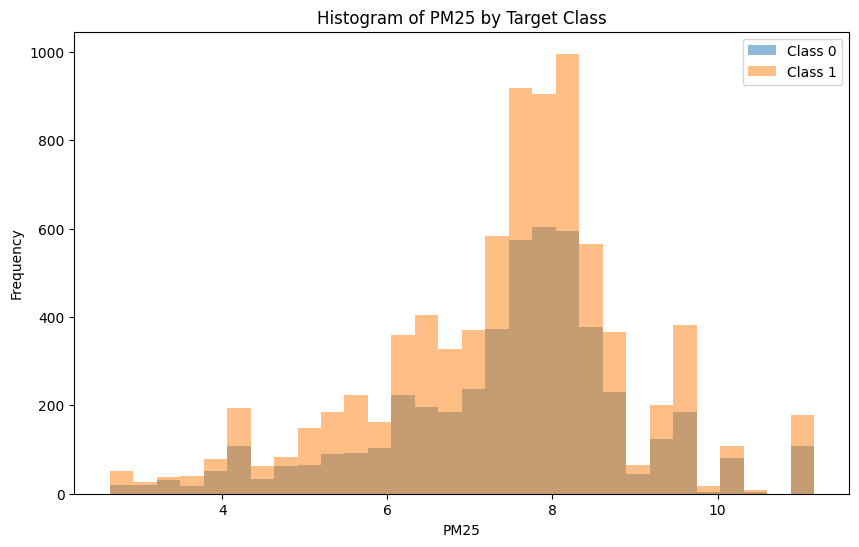

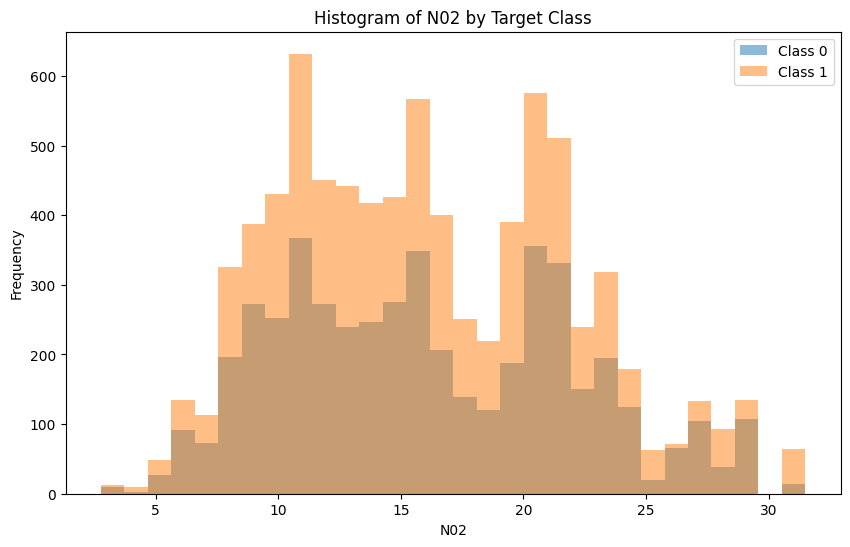

In [13]:
feature_summary_df = pd.DataFrame(feature_summary)
print("\nFeature Summary Table:")
print(feature_summary_df)

# 4. Handle Target: Focus on DiagPeriodL90D as the target
if 'DiagPeriodL90D' in train_data.columns:
    # Check unique values in the target
    print("\nTarget Analysis (DiagPeriodL90D):")
    print(f"Unique values in target: {train_data['DiagPeriodL90D'].unique()}")

    # Check class imbalance
    print("\nClass Distribution:")
    print(train_data['DiagPeriodL90D'].value_counts())
    print(f"\nClass Imbalance Ratio:\n{train_data['DiagPeriodL90D'].value_counts(normalize=True)}")

    # Create a binary target column (1 = diagnosis within 90 days, 0 = no diagnosis)
    train_data['target'] = train_data['DiagPeriodL90D'].apply(lambda x: 1 if x == 1 else 0)

    # Visualize target class distribution
    plt.figure(figsize=(8, 6))
    train_data['target'].value_counts().plot(kind='bar', color='skyblue')
    plt.title("Target Class Distribution (Within 90 Days)")
    plt.xlabel("Class (0 = No, 1 = Yes)")
    plt.ylabel("Count")
    plt.show()
else:
    print("DiagPeriodL90D column not found. Please verify the dataset.")

# 5. Identify Outliers (using IQR method for numerical columns)
def detect_outliers(column):
    if column in numerical_features:
        Q1 = train_data[column].quantile(0.25)
        Q3 = train_data[column].quantile(0.75)
        IQR = Q3 - Q1
        outliers = train_data[(train_data[column] < (Q1 - 1.5 * IQR)) | (train_data[column] > (Q3 + 1.5 * IQR))]
        return len(outliers)
    return 0

outliers_summary = {col: detect_outliers(col) for col in numerical_features}
print("\nOutliers Summary:")
print(outliers_summary)

# 6. Split Features (X) and Target (y)
X = train_data.drop(columns=['DiagPeriodL90D', 'target'])  # Drop the original and derived target columns
y = train_data['target']

# Check shapes
print(f"\nFeatures shape: {X.shape}")
print(f"Target shape: {y.shape}")

# 7. Visualize Features for Classification
numerical_features = X.select_dtypes(include=['float64', 'int64']).columns

for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    for target_class in [0, 1]:
        subset = train_data[train_data['target'] == target_class]
        plt.hist(subset[feature].dropna(), bins=30, alpha=0.5, label=f"Class {target_class}")
    plt.title(f"Histogram of {feature} by Target Class")
    plt.xlabel(feature)
    plt.ylabel("Frequency")
    plt.legend()
    plt.show()


#Purpose of Binning:

If the target were continuous (e.g., ranging from 0 to 1), it could divide it into intervals (bins) to create discrete classes. This allows for analyzing how features differ across target ranges.
Adaptation to Binary Target:

In this project, the target is binary (0 and 1). Thus, treated the two target values as two distinct classes:
Class 1: Target = 0 (No diagnosis).
Class 4: Target = 1 (Diagnosis).

## Data Cleaning and Preperation for Machine Learning

* Perform any data cleaning. Be clear what are you doing, for what feature.
* Determinine if rescaling is important for your Machine Learning model.
    * If so select strategy for each feature.
    * Apply rescaling.
* Visualize the features before and after cleaning and rescaling.
* One-hot encode your categorical features.

Missing Values:
patient_race                         6385
payer_type                           1803
patient_state                          51
bmi                                  8965
metastatic_first_novel_treatment    12882
                                    ...  
health_uninsured                        1
veteran                                 1
Ozone                                  29
PM25                                   29
N02                                    29
Length: 75, dtype: int64

Missing Values After Cleaning:
patient_id        0
patient_race      0
payer_type        0
patient_state     0
patient_zip3      0
                 ..
veteran           0
Ozone             0
PM25              0
N02               0
DiagPeriodL90D    0
Length: 83, dtype: int64

Feature Ranges Before Scaling:
patient_id: Min=100063, Max=999896
patient_zip3: Min=101, Max=999
patient_age: Min=18, Max=91
bmi: Min=14.0, Max=85.0
population: Min=635.5454545, Max=71374.13158
density: Min=0.916666667,

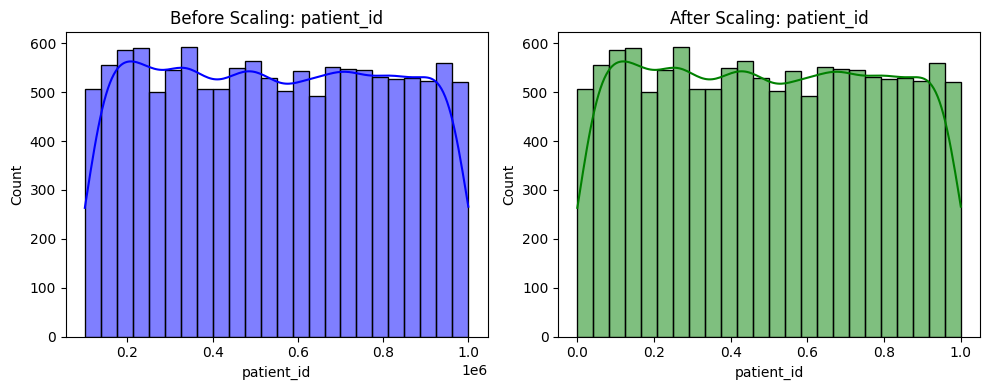

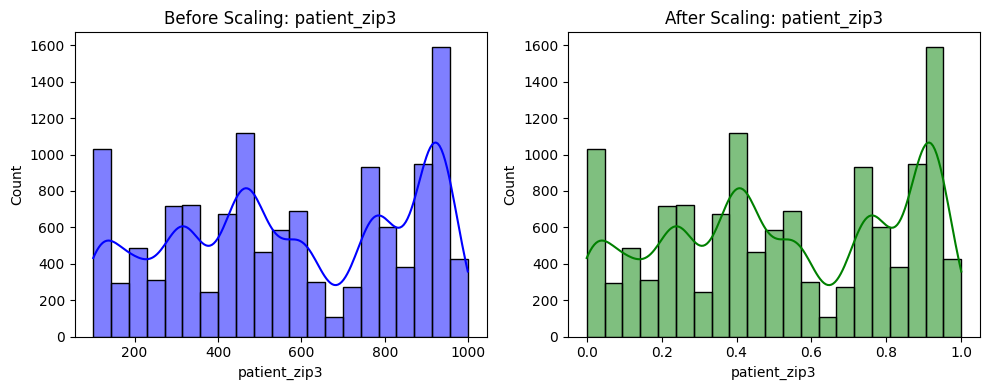

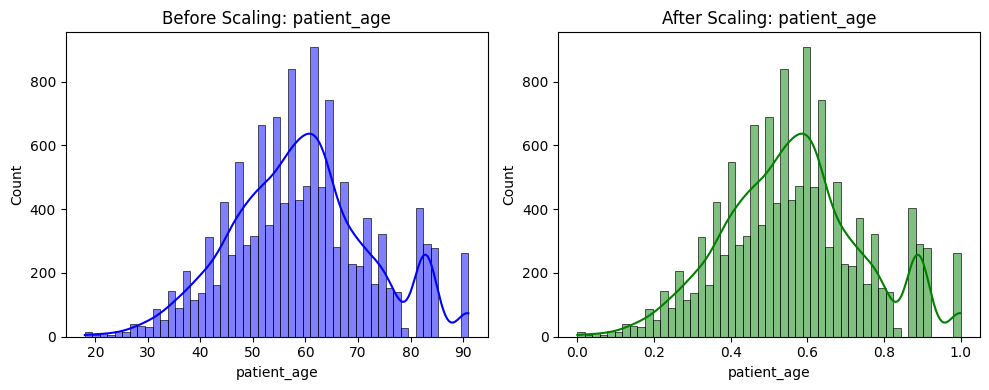

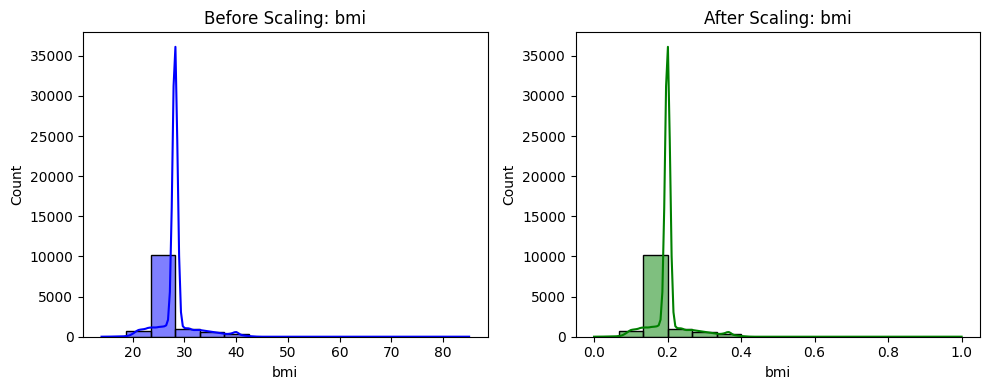

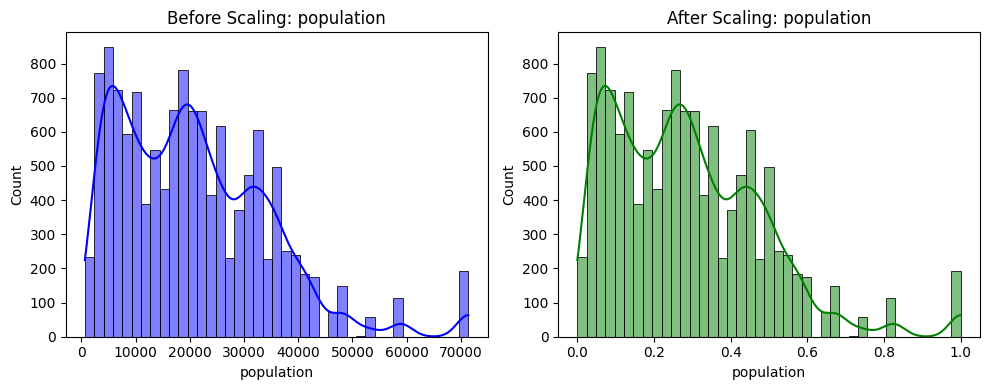


Categorical Features:
Index(['patient_race', 'payer_type', 'patient_state', 'patient_gender',
       'breast_cancer_diagnosis_code', 'breast_cancer_diagnosis_desc',
       'metastatic_cancer_diagnosis_code', 'metastatic_first_novel_treatment',
       'metastatic_first_novel_treatment_type', 'Region', 'Division'],
      dtype='object')

Final Dataset Shape After Encoding and Scaling:
(12906, 290)

Cleaned and prepared dataset saved to `cleaned_data.csv`.


In [4]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
train_data = pd.read_csv('training.csv')

# 1. Data Cleaning
# Identify missing values
print("Missing Values:")
missing_values = train_data.isnull().sum()
print(missing_values[missing_values > 0])

# Impute or drop missing values
for col in train_data.columns:
    if train_data[col].isnull().sum() > 0:
        if train_data[col].dtype in ['float64', 'int64']:
            train_data[col] = train_data[col].fillna(train_data[col].median())  # Correct assignment
        else:
            train_data[col] = train_data[col].fillna(train_data[col].mode()[0])  # Correct assignment


print("\nMissing Values After Cleaning:")
print(train_data.isnull().sum())

# 2. Determine Rescaling Needs
# Analyze the range of numerical features before scaling
numerical_features = train_data.select_dtypes(include=['float64', 'int64']).columns

print("\nFeature Ranges Before Scaling:")
for col in numerical_features:
    print(f"{col}: Min={train_data[col].min()}, Max={train_data[col].max()}")

# Rescaling strategy: Use Min-Max scaling for numerical features
scaler = MinMaxScaler()
train_data_scaled = train_data.copy()
train_data_scaled[numerical_features] = scaler.fit_transform(train_data[numerical_features])

# Visualize numerical features before and after scaling
for col in numerical_features[:5]:  # Display first 5 features for simplicity
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    sns.histplot(train_data[col], kde=True, color='blue')
    plt.title(f"Before Scaling: {col}")

    plt.subplot(1, 2, 2)
    sns.histplot(train_data_scaled[col], kde=True, color='green')
    plt.title(f"After Scaling: {col}")
    plt.tight_layout()
    plt.show()

# 3. One-Hot Encoding for Categorical Features
# Identify categorical features
categorical_features = train_data.select_dtypes(include=['object']).columns

print("\nCategorical Features:")
print(categorical_features)

# Apply one-hot encoding
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
categorical_data = pd.DataFrame(
    encoder.fit_transform(train_data[categorical_features]),
    columns=encoder.get_feature_names_out(categorical_features)
)

# Concatenate encoded categorical data with scaled numerical data
final_data = pd.concat([train_data_scaled.drop(columns=categorical_features), categorical_data], axis=1)

print("\nFinal Dataset Shape After Encoding and Scaling:")
print(final_data.shape)

# Save the cleaned and prepared dataset
final_data.to_csv('cleaned_data.csv', index=False)
print("\nCleaned and prepared dataset saved to `cleaned_data.csv`.")


## Machine Learning


### Problem Formulation

* Remove unneed columns, for example:
    * duplicated
    * categorical features that were turned into one-hot.
    * features that identify specific rows, like ID number.
    * make sure your target is properly encoded also.
* Split training sample into train, validation, and test sub-samples.

### Train ML Algorithm

* You only need one algorithm to work. You can do more if you like.
* For now, focus on making it work, rather than best result.
* Try to get a non-trivial result.

### Evaluate Performance on Validation Sample

* Compute the usual metric for your ML task.
* Compute the score for the kaggle challenge.

### Apply ML to the challenge test set

* Once trained, apply the ML algorithm the the test dataset and generate the submission file.


In [5]:
# Specify the target column
target_column = 'DiagPeriodL90D'  # Replace with your target column name (e.g., 'target_class' if you binned it earlier)

# Remove unnecessary columns
columns_to_drop = ['patient_id']  # Add other irrelevant columns if needed
X = final_data.drop(columns=columns_to_drop + [target_column])  # Drop target column for features
y = final_data[target_column]  # Target variable

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")
from sklearn.model_selection import train_test_split

# Split into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print(f"Training set: {X_train.shape}, Validation set: {X_val.shape}, Test set: {X_test.shape}")


Features shape: (12906, 288)
Target shape: (12906,)
Training set: (9034, 288), Validation set: (1936, 288), Test set: (1936, 288)


In [6]:
from sklearn.linear_model import LogisticRegression

# Initialize and train the model
model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(X_train, y_train)

print("Model training complete.")


Model training complete.


In [7]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, classification_report

# Make predictions on the validation set
y_val_pred = model.predict(X_val)
y_val_pred_proba = model.predict_proba(X_val)[:, 1]  # For ROC-AUC

# Compute evaluation metrics
print("Validation Metrics:")
print(f"Accuracy: {accuracy_score(y_val, y_val_pred):.2f}")
print(f"Precision: {precision_score(y_val, y_val_pred):.2f}")
print(f"Recall: {recall_score(y_val, y_val_pred):.2f}")
print(f"ROC-AUC: {roc_auc_score(y_val, y_val_pred_proba):.2f}")

# Detailed classification report
print("\nClassification Report:")
print(classification_report(y_val, y_val_pred))


Validation Metrics:
Accuracy: 0.81
Precision: 0.78
Recall: 0.96
ROC-AUC: 0.79

Classification Report:
              precision    recall  f1-score   support

         0.0       0.89      0.57      0.70       753
         1.0       0.78      0.96      0.86      1183

    accuracy                           0.81      1936
   macro avg       0.84      0.76      0.78      1936
weighted avg       0.82      0.81      0.80      1936



In [8]:
# Predict on test set
y_test_pred = model.predict(X_test)
y_test_pred_proba = model.predict_proba(X_test)[:, 1]

# Save predictions in a submission file
submission = pd.DataFrame({'Id': X_test.index, 'Prediction': y_test_pred})
submission.to_csv('submission.csv', index=False)
print("Submission file created: `submission.csv`")


Submission file created: `submission.csv`


In [9]:
from IPython.display import FileLink

# Create a link to download the file
FileLink("submission.csv")


/content/submission.csv